In [1610]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

## Adding UniProt DBDs to Lambert TFs

In [1434]:
# Loading in supplemental table 1 from Lambert et al 2018
lambert_TFs = pd.read_excel("../data/lambert_supp_tables.xlsx", sheet_name = "Table S1. Related to Figure 1B")
lambert_TFs = lambert_TFs[lambert_TFs["Is TF?"] == "Yes"]
lambert_TFs.head()

,Gene Information,Unnamed: 1,Unnamed: 2,Is TF?,Final Assesment,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Notes from re-reviewed genes,...,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Prior classifications,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
1,ENSG00000137203,TFAP2A,AP-2,Yes,Known motif,1 Monomer or homomultimer,High-throughput in vitro,NaN,NaN,NaN,...,Has known motif,1 Monomer or homomultimer,NaN,NaN,a,Yes,Yes,TF Gene_DNA-Binding: sequence-specific_DNA Bin...,Yes,NaN
2,ENSG00000008196,TFAP2B,AP-2,Yes,Known motif,1 Monomer or homomultimer,High-throughput in vitro,NaN,NaN,NaN,...,Has known motif,1 Monomer or homomultimer,NaN,NaN,a,Yes,Yes,TF Gene_DNA-Binding: sequence-specific_DNA Bin...,Yes,NaN
3,ENSG00000087510,TFAP2C,AP-2,Yes,Known motif,1 Monomer or homomultimer,High-throughput in vitro,NaN,NaN,NaN,...,Has known motif,1 Monomer or homomultimer,NaN,NaN,a,Yes,Yes,No,Yes,NaN
4,ENSG00000008197,TFAP2D,AP-2,Yes,Known motif,1 Monomer or homomultimer,In vivo/Misc source,Only known motifs are from Transfac or HocoMoc...,Binds the same GCCTGAGGC sequence as the other...,NaN,...,Has known motif,1 Monomer or homomultimer,Source of Hocomoco motif is unclear,NaN,a,Yes,Yes,No,Yes,NaN
5,ENSG00000116819,TFAP2E,AP-2,Yes,Known motif,1 Monomer or homomultimer,High-throughput in vitro,NaN,NaN,NaN,...,Has known motif,1 Monomer or homomultimer,NaN,NaN,a,Yes,Yes,TF Gene_DNA-Binding: sequence-specific_DNA Bin...,Yes,NaN


In [1435]:
# Downloading all Lambert TF ENSG codes
lambert_TFs_ENSG = lambert_TFs[["Gene Information"]]
lambert_TFs_ENSG.to_csv("../data/LambertTFs_ENSG.csv", header = None, index = False)
lambert_TFs_ENSG

,Gene Information
1,ENSG00000137203
2,ENSG00000008196
3,ENSG00000087510
4,ENSG00000008197
5,ENSG00000116819
...,...
2760,ENSG00000177683
2761,ENSG00000174796
2762,ENSG00000184436
2763,ENSG00000161277


Steps
1. Uploaded to UniProt ID mapping: https://www.uniprot.org/id-mapping
2. Selected: From database "Ensembl" To database "UniProtKB" then hit enter
4. Once search completed, filtered to only reviewed entries
5. Downloaded TSV, and added "DNA binding" column and "regions"

In [1437]:
# Output from uniprot
uniprot_DBD_output = pd.read_csv("../data/Lambert_TFs_DBD_uniprot_more_info.txt", sep = "\t")
uniprot_DBD_output

,From,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,DNA binding,Coiled coil,Compositional bias,Domain [CC],Domain [FT],Region,Repeat,Protein families,Motif,Sequence similarities,Zinc finger
0,ENSG00000233757,A0A087WUV0,reviewed,ZN892_HUMAN,Zinc finger protein 892,ZNF892,Homo sapiens (Human),522,NaN,NaN,"COMPBIAS 1..19; /note=""Basic and acidic residu...",NaN,NaN,"REGION 1..22; /note=""Disordered""; /evidence=""E...",NaN,Krueppel C2H2-type zinc-finger protein family,NaN,SIMILARITY: Belongs to the krueppel C2H2-type ...,"ZN_FING 221..243; /note=""C2H2-type 1""; /eviden..."
1,ENSG00000129173,A0AVK6,reviewed,E2F8_HUMAN,Transcription factor E2F8 (E2F-8),E2F8,Homo sapiens (Human),867,"DNA_BIND 113..182; /evidence=""ECO:0000255""; DN...",NaN,"COMPBIAS 410..432; /note=""Polar residues""; /ev...",DOMAIN: In contrast to classical members of th...,NaN,"REGION 38..58; /note=""Disordered""; /evidence=""...",NaN,E2F/DP family,NaN,SIMILARITY: Belongs to the E2F/DP family. {ECO...,NaN
2,ENSG00000128610,A0PJY2,reviewed,FEZF1_HUMAN,Fez family zinc finger protein 1 (Zinc finger ...,FEZF1 FEZ ZNF312B,Homo sapiens (Human),475,NaN,NaN,"COMPBIAS 436..466; /note=""Pro residues""; /evid...",NaN,NaN,"REGION 428..475; /note=""Disordered""; /evidence...",NaN,Krueppel C2H2-type zinc-finger protein family,"MOTIF 28..43; /note=""Engrailed homology 1 repr...",SIMILARITY: Belongs to the krueppel C2H2-type ...,"ZN_FING 260..282; /note=""C2H2-type 1""; /eviden..."
3,ENSG00000164334,A1A519,reviewed,F170A_HUMAN,Protein FAM170A (Zinc finger domain-containing...,FAM170A ZNFD,Homo sapiens (Human),330,NaN,NaN,"COMPBIAS 30..54; /note=""Polar residues""; /evid...",DOMAIN: The N-terminus is necessary for nuclea...,NaN,"REGION 1..54; /note=""Disordered""; /evidence=""E...",NaN,FAM170 family,NaN,SIMILARITY: Belongs to the FAM170 family. {ECO...,"ZN_FING 228..252; /note=""C2H2-type; degenerate"""
4,ENSG00000184828,A1YPR0,reviewed,ZBT7C_HUMAN,Zinc finger and BTB domain-containing protein ...,ZBTB7C APM1 ZBTB36 ZNF857C,Homo sapiens (Human),619,NaN,NaN,"COMPBIAS 130..176; /note=""Acidic residues""; /e...",NaN,"DOMAIN 34..101; /note=""BTB""; /evidence=""ECO:00...","REGION 129..218; /note=""Disordered""; /evidence...",NaN,NaN,NaN,NaN,"ZN_FING 364..386; /note=""C2H2-type 1""; /eviden..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1608,ENSG00000124151,Q9Y6Q9,reviewed,NCOA3_HUMAN,Nuclear receptor coactivator 3 (NCoA-3) (EC 2....,NCOA3 AIB1 BHLHE42 RAC3 TRAM1,Homo sapiens (Human),1424,NaN,NaN,"COMPBIAS 503..520; /note=""Polar residues""; /ev...",DOMAIN: Contains three Leu-Xaa-Xaa-Leu-Leu (LX...,"DOMAIN 25..82; /note=""bHLH""; /evidence=""ECO:00...","REGION 1..38; /note=""Disordered""; /evidence=""E...",NaN,SRC/p160 nuclear receptor coactivator family,"MOTIF 685..689; /note=""LXXLL motif 1""; MOTIF 7...",SIMILARITY: Belongs to the SRC/p160 nuclear re...,NaN
1609,ENSG00000128000,Q9Y6R6,reviewed,Z780B_HUMAN,Zinc finger protein 780B (Zinc finger protein ...,ZNF780B ZNF779,Homo sapiens (Human),833,NaN,NaN,NaN,NaN,"DOMAIN 6..77; /note=""KRAB""; /evidence=""ECO:000...",NaN,NaN,Krueppel C2H2-type zinc-finger protein family,NaN,SIMILARITY: Belongs to the krueppel C2H2-type ...,"ZN_FING 165..187; /note=""C2H2-type 1""; /eviden..."
1610,ENSG00000152217,Q9Y6X0,reviewed,SETBP_HUMAN,SET-binding protein (SEB),SETBP1 KIAA0437,Homo sapiens (Human),1596,"DNA_BIND 584..596; /note=""A.T hook 1""; DNA_BIN...",NaN,"COMPBIAS 145..163; /note=""Basic and acidic res...",NaN,NaN,"REGION 1..83; /note=""Disordered""; /evidence=""E...","REPEAT 1520..1527; /note=""1""; REPEAT 1528..153...",NaN,NaN,NaN,NaN
1611,ENSG00000178764,Q9Y6X8,reviewed,ZHX2_HUMAN,Zinc fingers and homeoboxes protein 2 (Alpha-f...,ZHX2 AFR1 KIAA0854 RAF,Homo sapiens (Human),837,"DNA_BIND 263..324; /note=""Homeobox 1""; /eviden...",NaN,"COMPBIAS 164..182; /note=""Polar residues""; /ev...",NaN,NaN,"REGION 27..77; /note=""Interaction with EFNB1"";...",NaN,ZHX family,NaN,SIMILARITY: Belon

#### Plan
- Get info from:
1. DNA binding
2. Domain [FT]
3. Region
4. Zinc finger

In [1439]:
uniprot_DBD_output = uniprot_DBD_output.fillna("")

In [1440]:
# NO info for these
uniprot_DBD_output[(uniprot_DBD_output["DNA binding"] == "") & (uniprot_DBD_output["Region"] == "") & (uniprot_DBD_output["Zinc finger"] == "") & (uniprot_DBD_output["Domain [FT]"] == "")]

,From,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,DNA binding,Coiled coil,Compositional bias,Domain [CC],Domain [FT],Region,Repeat,Protein families,Motif,Sequence similarities,Zinc finger
33,ENSG00000169689,A8MT69,reviewed,CENPX_HUMAN,Centromere protein X (CENP-X) (FANCM-associate...,CENPX FAAP10 MHF2 STRA13,Homo sapiens (Human),81,,,,,,,,CENP-X/MHF2 family,,SIMILARITY: Belongs to the CENP-X/MHF2 family....,
230,ENSG00000237765,P0CF97,reviewed,F200B_HUMAN,Protein FAM200B,FAM200B C4orf53,Homo sapiens (Human),657,,,,,,,,FAM200 family,,SIMILARITY: Belongs to the FAM200 family. {ECO...,
511,ENSG00000028839,P62380,reviewed,TBPL1_HUMAN,TATA box-binding protein-like 1 (TBP-like 1) (...,TBPL1 TLF TLP TLP21 TRF2 TRP,Homo sapiens (Human),186,,,,,,,,TBP family,,SIMILARITY: Belongs to the TBP family. {ECO:00...,
654,ENSG00000257923,Q13948,reviewed,CASP_HUMAN,Protein CASP,CUX1 CUTL1,Homo sapiens (Human),678,,"COILED 67..450; /evidence=""ECO:0000255""; COILE...",,,,,,CASP family,,SIMILARITY: Belongs to the CASP family. {ECO:0...,
775,ENSG00000120832,Q49AM1,reviewed,MTEF2_HUMAN,"Transcription termination factor 2, mitochondr...",MTERF2 MTERFD3,Homo sapiens (Human),385,,,,,,,,MTERF family,,SIMILARITY: Belongs to the mTERF family. {ECO:...,
844,ENSG00000174428,Q6EKJ0,reviewed,GTD2B_HUMAN,General transcription factor II-I repeat domai...,GTF2IRD2B,Homo sapiens (Human),949,,,,,,,"REPEAT 98..192; /note=""GTF2I-like 1""; REPEAT 3...",TFII-I family,,SIMILARITY: Belongs to the TFII-I family. {ECO...,
951,ENSG00000196275,Q86UP8,reviewed,GTD2A_HUMAN,General transcription factor II-I repeat domai...,GTF2IRD2 GTF2IRD2A,Homo sapiens (Human),949,,,,,,,"REPEAT 98..192; /note=""GTF2I-like 1""; REPEAT 3...",TFII-I family,,SIMILARITY: Belongs to the TFII-I family. {ECO...,
1120,ENSG00000198715,Q8WWB7,reviewed,GLMP_HUMAN,Glycosylated lysosomal membrane protein (Lysos...,GLMP C1orf85 PSEC0030 UNQ2553/PRO6182,Homo sapiens (Human),406,,,,,,,,GLMP family,"MOTIF 402..406; /note=""Lysosomal targeting mot...",SIMILARITY: Belongs to the GLMP family. {ECO:0...,
1495,ENSG00000163320,Q9UFW8,reviewed,CGBP1_HUMAN,CGG triplet repeat-binding protein 1 (CGG-bind...,CGGBP1 CGGBP,Homo sapiens (Human),167,,,,,,,,,"MOTIF 80..84; /note=""Nuclear localization sign...",,


In [1441]:
# Will add to this
DBD_list = uniprot_DBD_output.copy(deep = True)[["From", "Entry", "Entry Name"]]
DBD_list

,From,Entry,Entry Name
0,ENSG00000233757,A0A087WUV0,ZN892_HUMAN
1,ENSG00000129173,A0AVK6,E2F8_HUMAN
2,ENSG00000128610,A0PJY2,FEZF1_HUMAN
3,ENSG00000164334,A1A519,F170A_HUMAN
4,ENSG00000184828,A1YPR0,ZBT7C_HUMAN
...,...,...,...
1608,ENSG00000124151,Q9Y6Q9,NCOA3_HUMAN
1609,ENSG00000128000,Q9Y6R6,Z780B_HUMAN
1610,ENSG00000152217,Q9Y6X0,SETBP_HUMAN
1611,ENSG00000178764,Q9Y6X8,ZHX2_HUMAN


1. DNA Binding column

In [1443]:
DNA_binding_col_matches = uniprot_DBD_output["DNA binding"].str.extractall(r'DNA_BIND (\d+\.\.\d+)')
DNA_binding_col_matches = DNA_binding_col_matches.reset_index()
DNA_binding_col_matches

,level_0,match,0
0,1,0,113..182
1,1,1,261..347
2,6,0,149..208
3,8,0,132..191
4,11,0,16..75
...,...,...,...
593,1611,0,263..324
594,1611,1,439..501
595,1611,2,530..591
596,1611,3,628..690


In [1444]:
DBD_list = pd.merge(DBD_list, DNA_binding_col_matches, left_index = True, right_on = "level_0", how = "left")
DBD_list

,From,Entry,Entry Name,level_0,match,0
NaN,ENSG00000233757,A0A087WUV0,ZN892_HUMAN,0,NaN,NaN
0.0,ENSG00000129173,A0AVK6,E2F8_HUMAN,1,0.0,113..182
1.0,ENSG00000129173,A0AVK6,E2F8_HUMAN,1,1.0,261..347
NaN,ENSG00000128610,A0PJY2,FEZF1_HUMAN,2,NaN,NaN
NaN,ENSG00000164334,A1A519,F170A_HUMAN,3,NaN,NaN
...,...,...,...,...,...,...
593.0,ENSG00000178764,Q9Y6X8,ZHX2_HUMAN,1611,0.0,263..324
594.0,ENSG00000178764,Q9Y6X8,ZHX2_HUMAN,1611,1.0,439..501
595.0,ENSG00000178764,Q9Y6X8,ZHX2_HUMAN,1611,2.0,530..591
596.0,ENSG00000178764,Q9Y6X8,ZHX2_HUMAN,1611,3.0,628..690


In [1445]:
DBD_list = DBD_list.fillna("")
DBD_list

,From,Entry,Entry Name,level_0,match,0
NaN,ENSG00000233757,A0A087WUV0,ZN892_HUMAN,0,,
0.0,ENSG00000129173,A0AVK6,E2F8_HUMAN,1,0.0,113..182
1.0,ENSG00000129173,A0AVK6,E2F8_HUMAN,1,1.0,261..347
NaN,ENSG00000128610,A0PJY2,FEZF1_HUMAN,2,,
NaN,ENSG00000164334,A1A519,F170A_HUMAN,3,,
...,...,...,...,...,...,...
593.0,ENSG00000178764,Q9Y6X8,ZHX2_HUMAN,1611,0.0,263..324
594.0,ENSG00000178764,Q9Y6X8,ZHX2_HUMAN,1611,1.0,439..501
595.0,ENSG00000178764,Q9Y6X8,ZHX2_HUMAN,1611,2.0,530..591
596.0,ENSG00000178764,Q9Y6X8,ZHX2_HUMAN,1611,3.0,628..690


In [1446]:
start_ints = DBD_list[0].str.extract(r'(\d+)\.\.')[0]
end_ints =  DBD_list[0].str.extract(r'\.\.(\d+)')[0]
DBD_list[0] = list(zip(start_ints, end_ints))
DBD_list

,From,Entry,Entry Name,level_0,match,0
NaN,ENSG00000233757,A0A087WUV0,ZN892_HUMAN,0,,"(nan, nan)"
0.0,ENSG00000129173,A0AVK6,E2F8_HUMAN,1,0.0,"(113, 182)"
1.0,ENSG00000129173,A0AVK6,E2F8_HUMAN,1,1.0,"(261, 347)"
NaN,ENSG00000128610,A0PJY2,FEZF1_HUMAN,2,,"(nan, nan)"
NaN,ENSG00000164334,A1A519,F170A_HUMAN,3,,"(nan, nan)"
...,...,...,...,...,...,...
593.0,ENSG00000178764,Q9Y6X8,ZHX2_HUMAN,1611,0.0,"(263, 324)"
594.0,ENSG00000178764,Q9Y6X8,ZHX2_HUMAN,1611,1.0,"(439, 501)"
595.0,ENSG00000178764,Q9Y6X8,ZHX2_HUMAN,1611,2.0,"(530, 591)"
596.0,ENSG00000178764,Q9Y6X8,ZHX2_HUMAN,1611,3.0,"(628, 690)"


In [1447]:
#DBD_list[0] = DBD_list[0].astype(str)
DBD_list_func_joined = DBD_list.groupby(["From", "Entry", "Entry Name"])[0].apply(list).reset_index()
DBD_list_func_joined

,From,Entry,Entry Name,0
0,ENSG00000001167,P23511,NFYA_HUMAN,"[(296, 321)]"
1,ENSG00000004848,Q96QS3,ARX_HUMAN,"[(328, 387)]"
2,ENSG00000005073,P31270,HXA11_HUMAN,"[(241, 300)]"
3,ENSG00000005102,P50221,MEOX1_HUMAN,"[(171, 230)]"
4,ENSG00000005513,P57073,SOX8_HUMAN,"[(102, 170)]"
...,...,...,...,...
1608,ENSG00000277258,P35227,PCGF2_HUMAN,"[(nan, nan)]"
1609,ENSG00000277462,Q9BS34,ZN670_HUMAN,"[(nan, nan)]"
1610,ENSG00000278129,P17098,ZNF8_HUMAN,"[(nan, nan)]"
1611,ENSG00000278318,Q9UJW7,ZN229_HUMAN,"[(nan, nan)]"


In [1448]:
DBD_list_func_joined = DBD_list_func_joined.rename(columns = {0: "Function"})
DBD_list_func_joined

,From,Entry,Entry Name,Function
0,ENSG00000001167,P23511,NFYA_HUMAN,"[(296, 321)]"
1,ENSG00000004848,Q96QS3,ARX_HUMAN,"[(328, 387)]"
2,ENSG00000005073,P31270,HXA11_HUMAN,"[(241, 300)]"
3,ENSG00000005102,P50221,MEOX1_HUMAN,"[(171, 230)]"
4,ENSG00000005513,P57073,SOX8_HUMAN,"[(102, 170)]"
...,...,...,...,...
1608,ENSG00000277258,P35227,PCGF2_HUMAN,"[(nan, nan)]"
1609,ENSG00000277462,Q9BS34,ZN670_HUMAN,"[(nan, nan)]"
1610,ENSG00000278129,P17098,ZNF8_HUMAN,"[(nan, nan)]"
1611,ENSG00000278318,Q9UJW7,ZN229_HUMAN,"[(nan, nan)]"


In [1449]:
DBD_list_func_joined['Function'] = DBD_list_func_joined['Function'].apply(lambda x: np.nan if x == [(np.nan, np.nan)] else x)
DBD_list_func_joined

,From,Entry,Entry Name,Function
0,ENSG00000001167,P23511,NFYA_HUMAN,"[(296, 321)]"
1,ENSG00000004848,Q96QS3,ARX_HUMAN,"[(328, 387)]"
2,ENSG00000005073,P31270,HXA11_HUMAN,"[(241, 300)]"
3,ENSG00000005102,P50221,MEOX1_HUMAN,"[(171, 230)]"
4,ENSG00000005513,P57073,SOX8_HUMAN,"[(102, 170)]"
...,...,...,...,...
1608,ENSG00000277258,P35227,PCGF2_HUMAN,NaN
1609,ENSG00000277462,Q9BS34,ZN670_HUMAN,NaN
1610,ENSG00000278129,P17098,ZNF8_HUMAN,NaN
1611,ENSG00000278318,Q9UJW7,ZN229_HUMAN,NaN


---
2. Now, using Regions

In [1451]:
uniprot_DBD_output["Region"]

0       REGION 1..22; /note="Disordered"; /evidence="E...
1       REGION 38..58; /note="Disordered"; /evidence="...
2       REGION 428..475; /note="Disordered"; /evidence...
3       REGION 1..54; /note="Disordered"; /evidence="E...
4       REGION 129..218; /note="Disordered"; /evidence...
                              ...                        
1608    REGION 1..38; /note="Disordered"; /evidence="E...
1609                                                     
1610    REGION 1..83; /note="Disordered"; /evidence="E...
1611    REGION 27..77; /note="Interaction with EFNB1";...
1612    REGION 283..375; /note="Disordered"; /evidence...
Name: Region, Length: 1613, dtype: object

In [1452]:
for _ in uniprot_DBD_output["Region"].str.extractall(r'note="(.+?)"').reset_index().sort_values(by = 0)[0].unique():
    print(_)

10 X 4 AA tandem repeats of S-P-[RGMKC]-[RK]
11 X 7 AA tandem repeats of [DR]-P-Y-R-[LI][AG][QHP]
13 X 2 AA tandem repeats of G-Q
14 X 6 AA repeats of [ED]-R-S-M-M-S
15 X 9 AA tandem repeats of P-P-x-x-P-x-P-P-x
17 X 10 AA tandem repeats of L-A-[ST]-[NSG]-[TS]-MDSQM
2 X 19 AA repeats of P-S-R-R-R-R-S-R-S-V-V-R-R-R-S-F-S-I-S
2 X 2 AA tandem repeats of G-Q
2 approximate SP repeats
3 X 11 AA tandem repats of P-P-L-P-P-E-E-P-P-[TME]-[MTG]
3 X 12 AA approximate repeats
3 X 7 AA repeat of P-E-V-E-A-A-E
3 X 8 AA tandem repeats of P-P-L-P-P-P-P-P
3 X SP repeats
3 X approximate SP repeats
3 X tandem repeats of [ST]-P-[VLI]-R-[RL]-[RK]-[RF]-S-R
4 X 5 AA repeat of P-X-G-E-A
4 X 67 AA tandem repeats
4 X 7 AA repeats of P-[LV]-T-[IL]-T-[ST]-P
4 X 8 AA tandem repeats of V-L-E-SS-[AVT]-VT
4 X approximate tandem repeats
6 X 2 AA tandem repeats of K-G
6 X 4 AA tandem repeats of S-P-X-[RK]
7 X 7 AA repeats of P-S-R-R-S-R-[TS]
8 X repeats starting with a Trp in each unit
A domain
AF-2
AF-2 domain
AF1; me

In [1453]:
for _ in uniprot_DBD_output["Region"].str.extractall(r'note="(.+?)"').reset_index().sort_values(by = 0)[0].unique():
    if "DNA" in _:
        print(_)

Basic (repression of DNA-binding)
Binding to DNA
Core promoter DNA-binding
Critical for glycosaminoglycan, lipid A, lysozyme and DNA binding
DNA replication foci-targeting sequence
DNA-binding
DNA-binding domain
DNA-binding regulation
DNA-binding; major groove
DNA-binding; minor groove
Important for DNA and nucleosome binding
Important for flexibility of DNA ends that protrude from nucleosomes
Important for interaction with target DNA
Interaction with 5-mCpG DNA
Interaction with DNA
Interaction with ss-DNA
Interaction with target DNA
Involved in DNA-binding
Mediates dimerization, DNA-binding, transcription repression of CCNA2 and interaction with HMGA2
Mediates promoter DNA-binding and activation of transcription
No DNA binding activity or transactivation activity, but complete prevention of TRAF-dependent NF-Kappa-B activation; associates with TRAF2 and JUN
Required for DNA binding
Required for DNA-PK heterotrimer
Required for DNA-binding
Required for DNA-binding and interaction with 

Keep the following regions:

DNA-binding
DNA-binding domain
DNA-binding; major groove
DNA-binding; minor groove

In [1455]:
DNA_binding_region_terms = ["DNA-binding", 
                            "DNA-binding domain", 
                            "DNA-binding; major groove", 
                            "DNA-binding; minor groove",
                           "Leucine-zipper",
                            "Leucine-zipper 1",
                            "Leucine-zipper 2",
                            "Winged helix-turn-helix (wHTH)",
                           "Binding to DNA","Helix-loop-helix motif", "CSD",
                            "Required for DNA binding","Required for DNA-binding"
                           ]
DNA_binding_region_terms

['DNA-binding',
 'DNA-binding domain',
 'DNA-binding; major groove',
 'DNA-binding; minor groove',
 'Leucine-zipper',
 'Leucine-zipper 1',
 'Leucine-zipper 2',
 'Winged helix-turn-helix (wHTH)',
 'Binding to DNA',
 'Helix-loop-helix motif',
 'CSD',
 'Required for DNA binding',
 'Required for DNA-binding']

In [1456]:
pat = r'(REGION (\d+\.\.\d+?); \/note="(.+?)"?;)'
string_to_search = 'REGION 1..22; /note="DNA-binding; minor groove"; /evidence="ECO:0000256|SAM:MobiDB-lite"; REGION 96..124; /note="Disordered"; /evidence="ECO:0000256|SAM:MobiDB-lite"'
print(string_to_search)

REGION 1..22; /note="DNA-binding; minor groove"; /evidence="ECO:0000256|SAM:MobiDB-lite"; REGION 96..124; /note="Disordered"; /evidence="ECO:0000256|SAM:MobiDB-lite"


In [1457]:
re.findall(pat, string_to_search)

[('REGION 1..22; /note="DNA-binding;', '1..22', 'DNA-binding'),
 ('REGION 96..124; /note="Disordered";', '96..124', 'Disordered')]

In [1458]:
import numpy as np
np.nan

nan

In [1459]:
DBD_list_func_joined

,From,Entry,Entry Name,Function
0,ENSG00000001167,P23511,NFYA_HUMAN,"[(296, 321)]"
1,ENSG00000004848,Q96QS3,ARX_HUMAN,"[(328, 387)]"
2,ENSG00000005073,P31270,HXA11_HUMAN,"[(241, 300)]"
3,ENSG00000005102,P50221,MEOX1_HUMAN,"[(171, 230)]"
4,ENSG00000005513,P57073,SOX8_HUMAN,"[(102, 170)]"
...,...,...,...,...
1608,ENSG00000277258,P35227,PCGF2_HUMAN,NaN
1609,ENSG00000277462,Q9BS34,ZN670_HUMAN,NaN
1610,ENSG00000278129,P17098,ZNF8_HUMAN,NaN
1611,ENSG00000278318,Q9UJW7,ZN229_HUMAN,NaN


In [1460]:
region_DBDs = []

for i in uniprot_DBD_output.index:
    row_DBDs = []
    
    row = uniprot_DBD_output.iloc[i]
    region_descrip = row["Region"]
    pat = r'(REGION (\d+\.\.\d+?); \/note="(.+?)"?;)'
    regex_find = re.findall(pat, region_descrip)
    
    for find in regex_find:
        if find[2] in DNA_binding_region_terms:
            coords = find[1]
            start = re.search(r'(\d+)', coords)[0]
            end = re.search(r'\d+\.\.(\d+)', coords)[1]
            row_DBDs.append((start, end))
            
    if len(row_DBDs) == 0:
        row_DBDs = np.nan
    else:
        print(row["Entry Name"])
        print(row_DBDs)
        
        
    region_DBDs.append(row_DBDs)

uniprot_DBD_output["Region_extrac"] = region_DBDs
uniprot_DBD_output

E2F3_HUMAN
[('204', '225')]
BACH1_HUMAN
[('582', '589')]
P73_HUMAN
[('131', '310')]
FOXP2_HUMAN
[('388', '409')]
MAFG_HUMAN
[('79', '93')]
CREB3_HUMAN
[('192', '213')]
CRBL2_HUMAN
[('62', '69')]
MAFK_HUMAN
[('79', '93')]
KIN17_HUMAN
[('51', '160')]
MITF_HUMAN
[('374', '395')]
MAF_HUMAN
[('316', '337')]
E2F6_HUMAN
[('143', '164')]
ZBED1_HUMAN
[('552', '624')]
FOS_HUMAN
[('165', '193')]
JUN_HUMAN
[('280', '308')]
PO2F2_HUMAN
[('389', '410')]
ATF2_HUMAN
[('380', '408')]
FOSL1_HUMAN
[('133', '161')]
FOSL2_HUMAN
[('129', '136')]
ITF2_HUMAN
[('379', '400')]
TFE2_HUMAN
[('389', '425')]
CREB1_HUMAN
[('297', '318')]
JUNB_HUMAN
[('296', '324')]
JUND_HUMAN
[('296', '324')]
ATF7_HUMAN
[('360', '388')]
CEBPB_HUMAN
[('297', '304')]
XBP1_HUMAN
[('98', '133')]
ATF1_HUMAN
[('241', '262')]
ATF3_HUMAN
[('114', '142')]
ATF4_HUMAN
[('306', '334')]
ATF6A_HUMAN
[('348', '355')]
TFEB_HUMAN
[('298', '319')]
TFE3_HUMAN
[('409', '430')]
TYY1_HUMAN
[('295', '414')]
ARNT_HUMAN
[('88', '128')]
DDIT3_HUMAN
[('134', 

,From,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,DNA binding,Coiled coil,Compositional bias,Domain [CC],Domain [FT],Region,Repeat,Protein families,Motif,Sequence similarities,Zinc finger,Region_extrac
0,ENSG00000233757,A0A087WUV0,reviewed,ZN892_HUMAN,Zinc finger protein 892,ZNF892,Homo sapiens (Human),522,,,"COMPBIAS 1..19; /note=""Basic and acidic residu...",,,"REGION 1..22; /note=""Disordered""; /evidence=""E...",,Krueppel C2H2-type zinc-finger protein family,,SIMILARITY: Belongs to the krueppel C2H2-type ...,"ZN_FING 221..243; /note=""C2H2-type 1""; /eviden...",NaN
1,ENSG00000129173,A0AVK6,reviewed,E2F8_HUMAN,Transcription factor E2F8 (E2F-8),E2F8,Homo sapiens (Human),867,"DNA_BIND 113..182; /evidence=""ECO:0000255""; DN...",,"COMPBIAS 410..432; /note=""Polar residues""; /ev...",DOMAIN: In contrast to classical members of th...,,"REGION 38..58; /note=""Disordered""; /evidence=""...",,E2F/DP family,,SIMILARITY: Belongs to the E2F/DP family. {ECO...,,NaN
2,ENSG00000128610,A0PJY2,reviewed,FEZF1_HUMAN,Fez family zinc finger protein 1 (Zinc finger ...,FEZF1 FEZ ZNF312B,Homo sapiens (Human),475,,,"COMPBIAS 436..466; /note=""Pro residues""; /evid...",,,"REGION 428..475; /note=""Disordered""; /evidence...",,Krueppel C2H2-type zinc-finger protein family,"MOTIF 28..43; /note=""Engrailed homology 1 repr...",SIMILARITY: Belongs to the krueppel C2H2-type ...,"ZN_FING 260..282; /note=""C2H2-type 1""; /eviden...",NaN
3,ENSG00000164334,A1A519,reviewed,F170A_HUMAN,Protein FAM170A (Zinc finger domain-containing...,FAM170A ZNFD,Homo sapiens (Human),330,,,"COMPBIAS 30..54; /note=""Polar residues""; /evid...",DOMAIN: The N-terminus is necessary for nuclea...,,"REGION 1..54; /note=""Disordered""; /evidence=""E...",,FAM170 family,,SIMILARITY: Belongs to the FAM170 family. {ECO...,"ZN_FING 228..252; /note=""C2H2-type; degenerate""",NaN
4,ENSG00000184828,A1YPR0,reviewed,ZBT7C_HUMAN,Zinc finger and BTB domain-containing protein ...,ZBTB7C APM1 ZBTB36 ZNF857C,Homo sapiens (Human),619,,,"COMPBIAS 130..176; /note=""Acidic residues""; /e...",,"DOMAIN 34..101; /note=""BTB""; /evidence=""ECO:00...","REGION 129..218; /note=""Disordered""; /evidence...",,,,,"ZN_FING 364..386; /note=""C2H2-type 1""; /eviden...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1608,ENSG00000124151,Q9Y6Q9,reviewed,NCOA3_HUMAN,Nuclear receptor coactivator 3 (NCoA-3) (EC 2....,NCOA3 AIB1 BHLHE42 RAC3 TRAM1,Homo sapiens (Human),1424,,,"COMPBIAS 503..520; /note=""Polar residues""; /ev...",DOMAIN: Contains three Leu-Xaa-Xaa-Leu-Leu (LX...,"DOMAIN 25..82; /note=""bHLH""; /evidence=""ECO:00...","REGION 1..38; /note=""Disordered""; /evidence=""E...",,SRC/p160 nuclear receptor coactivator family,"MOTIF 685..689; /note=""LXXLL motif 1""; MOTIF 7...",SIMILARITY: Belongs to the SRC/p160 nuclear re...,,NaN
1609,ENSG00000128000,Q9Y6R6,reviewed,Z780B_HUMAN,Zinc finger protein 780B (Zinc finger protein ...,ZNF780B ZNF779,Homo sapiens (Human),833,,,,,"DOMAIN 6..77; /note=""KRAB""; /evidence=""ECO:000...",,,Krueppel C2H2-type zinc-finger protein family,,SIMILARITY: Belongs to the krueppel C2H2-type ...,"ZN_FING 165..187; /note=""C2H2-type 1""; /eviden...",NaN
1610,ENSG00000152217,Q9Y6X0,reviewed,SETBP_HUMAN,SET-binding protein (SEB),SETBP1 KIAA0437,Homo sapiens (Human),1596,"DNA_BIND 584..596; /note=""A.T hook 1""; DNA_BIN...",,"COMPBIAS 145..163; /note=""Basic and acidic res...",,,"REGION 1..83; /note=""Disordered""; /evidence=""E...","REPEAT 1520..1527; /note=""1""; REPEAT 1528..153...",,,,,NaN
1611,ENSG00000178764,Q9Y6X8,reviewed,ZHX2_HUMAN,Zinc fingers and homeoboxes protein 2 (Alpha-f...,ZHX2 AFR1 KIAA0854 RAF,Homo sapiens (Human),837,"DNA_BIND 263..324; /note=""Homeobox 1""; /eviden...",,"COMPBIAS 164..182; /note=""Polar residues""; /ev...",,,"REGION 27..77; /note=""Interaction with EFNB1"";...",,ZHX family,,SIMILARITY: Belongs to the ZHX family. {ECO:00...,"ZN_FING 78..101; /note=""C2H2-type 1""; /evidenc...",NaN


In [1461]:
DBD_list_func_joined = pd.merge(DBD_list_func_joined, uniprot_DBD_output[["Entry", "Region_extrac"]], on = "Entry", how = "left")
DBD_list_func_joined

,From,Entry,Entry Name,Function,Region_extrac
0,ENSG00000001167,P23511,NFYA_HUMAN,"[(296, 321)]",NaN
1,ENSG00000004848,Q96QS3,ARX_HUMAN,"[(328, 387)]",NaN
2,ENSG00000005073,P31270,HXA11_HUMAN,"[(241, 300)]",NaN
3,ENSG00000005102,P50221,MEOX1_HUMAN,"[(171, 230)]",NaN
4,ENSG00000005513,P57073,SOX8_HUMAN,"[(102, 170)]",NaN
...,...,...,...,...,...
1608,ENSG00000277258,P35227,PCGF2_HUMAN,NaN,NaN
1609,ENSG00000277462,Q9BS34,ZN670_HUMAN,NaN,NaN
1610,ENSG00000278129,P17098,ZNF8_HUMAN,NaN,NaN
1611,ENSG00000278318,Q9UJW7,ZN229_HUMAN,NaN,NaN


In [1462]:
DBD_list_func_joined = DBD_list_func_joined.rename(columns = {"Region_extrac":"Region"})
DBD_list_func_joined

,From,Entry,Entry Name,Function,Region
0,ENSG00000001167,P23511,NFYA_HUMAN,"[(296, 321)]",NaN
1,ENSG00000004848,Q96QS3,ARX_HUMAN,"[(328, 387)]",NaN
2,ENSG00000005073,P31270,HXA11_HUMAN,"[(241, 300)]",NaN
3,ENSG00000005102,P50221,MEOX1_HUMAN,"[(171, 230)]",NaN
4,ENSG00000005513,P57073,SOX8_HUMAN,"[(102, 170)]",NaN
...,...,...,...,...,...
1608,ENSG00000277258,P35227,PCGF2_HUMAN,NaN,NaN
1609,ENSG00000277462,Q9BS34,ZN670_HUMAN,NaN,NaN
1610,ENSG00000278129,P17098,ZNF8_HUMAN,NaN,NaN
1611,ENSG00000278318,Q9UJW7,ZN229_HUMAN,NaN,NaN


In [1463]:
DBD_list_func_joined[(~DBD_list_func_joined["Function"].isna()) & (~DBD_list_func_joined["Region"].isna())]

,From,Entry,Entry Name,Function,Region
14,ENSG00000007968,Q14209,E2F2_HUMAN,"[(107, 196)]","[(155, 176)]"
39,ENSG00000028277,P09086,PO2F2_HUMAN,"[(297, 356)]","[(389, 410)]"
50,ENSG00000049768,Q9BZS1,FOXP3_HUMAN,"[(337, 423)]","[(239, 260)]"
154,ENSG00000100207,Q9UGU0,TCF20_HUMAN,"[(1537, 1551)]","[(1170, 1191)]"
169,ENSG00000101412,Q01094,E2F1_HUMAN,"[(110, 194)]","[(153, 174)]"
268,ENSG00000111704,Q9H9S0,NANOG_HUMAN,"[(95, 154)]","[(122, 151)]"
274,ENSG00000112242,O00716,E2F3_HUMAN,"[(155, 245)]","[(204, 225)]"
294,ENSG00000114861,Q9H334,FOXP1_HUMAN,"[(465, 555)]","[(348, 369)]"
455,ENSG00000128573,O15409,FOXP2_HUMAN,"[(504, 594)]","[(388, 409)]"
512,ENSG00000133740,Q15329,E2F5_HUMAN,"[(47, 118)]","[(76, 98)]"


In [1464]:
# Still 1,085 without annotations yet
DBD_list_func_joined[(DBD_list_func_joined["Function"].isna()) & (DBD_list_func_joined["Region"].isna())]

,From,Entry,Entry Name,Function,Region
5,ENSG00000005801,O14628,ZN195_HUMAN,NaN,NaN
6,ENSG00000005889,P17010,ZFX_HUMAN,NaN,NaN
7,ENSG00000006047,Q9Y2T7,YBOX2_HUMAN,NaN,NaN
8,ENSG00000006194,O14978,ZN263_HUMAN,NaN,NaN
11,ENSG00000006704,Q9UHL9,GT2D1_HUMAN,NaN,NaN
...,...,...,...,...,...
1607,ENSG00000276644,Q9UI36,DACH1_HUMAN,NaN,NaN
1608,ENSG00000277258,P35227,PCGF2_HUMAN,NaN,NaN
1609,ENSG00000277462,Q9BS34,ZN670_HUMAN,NaN,NaN
1610,ENSG00000278129,P17098,ZNF8_HUMAN,NaN,NaN


In [1465]:
DBD_list_func_joined[(~DBD_list_func_joined["Function"].isna()) | (~DBD_list_func_joined["Region"].isna())]

,From,Entry,Entry Name,Function,Region
0,ENSG00000001167,P23511,NFYA_HUMAN,"[(296, 321)]",NaN
1,ENSG00000004848,Q96QS3,ARX_HUMAN,"[(328, 387)]",NaN
2,ENSG00000005073,P31270,HXA11_HUMAN,"[(241, 300)]",NaN
3,ENSG00000005102,P50221,MEOX1_HUMAN,"[(171, 230)]",NaN
4,ENSG00000005513,P57073,SOX8_HUMAN,"[(102, 170)]",NaN
...,...,...,...,...,...
1600,ENSG00000273514,Q3SYB3,FX4L6_HUMAN,"[(108, 202)]",NaN
1601,ENSG00000273706,P48742,LHX1_HUMAN,"[(180, 239)]",NaN
1603,ENSG00000274529,Q9HB31,SEBOX_HUMAN,"[(19, 78)]",NaN
1606,ENSG00000275410,P35680,HNF1B_HUMAN,"[(231, 311)]",NaN


3. Zinc fingers

In [1467]:
uniprot_DBD_output["Zinc finger_split"] = uniprot_DBD_output["Zinc finger"].str.split("ZN_FING")
uniprot_DBD_output

,From,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,DNA binding,Coiled coil,...,Domain [CC],Domain [FT],Region,Repeat,Protein families,Motif,Sequence similarities,Zinc finger,Region_extrac,Zinc finger_split
0,ENSG00000233757,A0A087WUV0,reviewed,ZN892_HUMAN,Zinc finger protein 892,ZNF892,Homo sapiens (Human),522,,,...,,,"REGION 1..22; /note=""Disordered""; /evidence=""E...",,Krueppel C2H2-type zinc-finger protein family,,SIMILARITY: Belongs to the krueppel C2H2-type ...,"ZN_FING 221..243; /note=""C2H2-type 1""; /eviden...",NaN,"[, 221..243; /note=""C2H2-type 1""; /evidence=""..."
1,ENSG00000129173,A0AVK6,reviewed,E2F8_HUMAN,Transcription factor E2F8 (E2F-8),E2F8,Homo sapiens (Human),867,"DNA_BIND 113..182; /evidence=""ECO:0000255""; DN...",,...,DOMAIN: In contrast to classical members of th...,,"REGION 38..58; /note=""Disordered""; /evidence=""...",,E2F/DP family,,SIMILARITY: Belongs to the E2F/DP family. {ECO...,,NaN,[]
2,ENSG00000128610,A0PJY2,reviewed,FEZF1_HUMAN,Fez family zinc finger protein 1 (Zinc finger ...,FEZF1 FEZ ZNF312B,Homo sapiens (Human),475,,,...,,,"REGION 428..475; /note=""Disordered""; /evidence...",,Krueppel C2H2-type zinc-finger protein family,"MOTIF 28..43; /note=""Engrailed homology 1 repr...",SIMILARITY: Belongs to the krueppel C2H2-type ...,"ZN_FING 260..282; /note=""C2H2-type 1""; /eviden...",NaN,"[, 260..282; /note=""C2H2-type 1""; /evidence=""..."
3,ENSG00000164334,A1A519,reviewed,F170A_HUMAN,Protein FAM170A (Zinc finger domain-containing...,FAM170A ZNFD,Homo sapiens (Human),330,,,...,DOMAIN: The N-terminus is necessary for nuclea...,,"REGION 1..54; /note=""Disordered""; /evidence=""E...",,FAM170 family,,SIMILARITY: Belongs to the FAM170 family. {ECO...,"ZN_FING 228..252; /note=""C2H2-type; degenerate""",NaN,"[, 228..252; /note=""C2H2-type; degenerate""]"
4,ENSG00000184828,A1YPR0,reviewed,ZBT7C_HUMAN,Zinc finger and BTB domain-containing protein ...,ZBTB7C APM1 ZBTB36 ZNF857C,Homo sapiens (Human),619,,,...,,"DOMAIN 34..101; /note=""BTB""; /evidence=""ECO:00...","REGION 129..218; /note=""Disordered""; /evidence...",,,,,"ZN_FING 364..386; /note=""C2H2-type 1""; /eviden...",NaN,"[, 364..386; /note=""C2H2-type 1""; /evidence=""..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1608,ENSG00000124151,Q9Y6Q9,reviewed,NCOA3_HUMAN,Nuclear receptor coactivator 3 (NCoA-3) (EC 2....,NCOA3 AIB1 BHLHE42 RAC3 TRAM1,Homo sapiens (Human),1424,,,...,DOMAIN: Contains three Leu-Xaa-Xaa-Leu-Leu (LX...,"DOMAIN 25..82; /note=""bHLH""; /evidence=""ECO:00...","REGION 1..38; /note=""Disordered""; /evidence=""E...",,SRC/p160 nuclear receptor coactivator family,"MOTIF 685..689; /note=""LXXLL motif 1""; MOTIF 7...",SIMILARITY: Belongs to the SRC/p160 nuclear re...,,NaN,[]
1609,ENSG00000128000,Q9Y6R6,reviewed,Z780B_HUMAN,Zinc finger protein 780B (Zinc finger protein ...,ZNF780B ZNF779,Homo sapiens (Human),833,,,...,,"DOMAIN 6..77; /note=""KRAB""; /evidence=""ECO:000...",,,Krueppel C2H2-type zinc-finger protein family,,SIMILARITY: Belongs to the krueppel C2H2-type ...,"ZN_FING 165..187; /note=""C2H2-type 1""; /eviden...",NaN,"[, 165..187; /note=""C2H2-type 1""; /evidence=""..."
1610,ENSG00000152217,Q9Y6X0,reviewed,SETBP_HUMAN,SET-binding protein (SEB),SETBP1 KIAA0437,Homo sapiens (Human),1596,"DNA_BIND 584..596; /note=""A.T hook 1""; DNA_BIN...",,...,,,"REGION 1..83; /note=""Disordered""; /evidence=""E...","REPEAT 1520..1527; /note=""1""; REPEAT 1528..153...",,,,,NaN,[]
1611,ENSG00000178764,Q9Y6X8,reviewed,ZHX2_HUMAN,Zinc fingers and homeoboxes protein 2 (Alpha-f...,ZHX2 AFR1 KIAA0854 RAF,Homo sapiens (Human),837,"DNA_BIND 263..324; /note=""Homeobox 1""; /eviden...",,...,,,"REGION 27..77; /note=""Interaction with EFNB1"";...",,ZHX family,,SIMILARITY: Belongs to the ZHX family. {ECO:00...,"ZN_FING 78..101; /note=""C2H2-type 1""; /evidenc...",NaN,"[, 78..101; /note=""C2H2-type 1""; /evidence=""E..."


In [1468]:
uniprot_DBD_output_ZNF_exp = uniprot_DBD_output.explode("Zinc finger_split")
uniprot_DBD_output_ZNF_exp

,From,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,DNA binding,Coiled coil,...,Domain [CC],Domain [FT],Region,Repeat,Protein families,Motif,Sequence similarities,Zinc finger,Region_extrac,Zinc finger_split
0,ENSG00000233757,A0A087WUV0,reviewed,ZN892_HUMAN,Zinc finger protein 892,ZNF892,Homo sapiens (Human),522,,,...,,,"REGION 1..22; /note=""Disordered""; /evidence=""E...",,Krueppel C2H2-type zinc-finger protein family,,SIMILARITY: Belongs to the krueppel C2H2-type ...,"ZN_FING 221..243; /note=""C2H2-type 1""; /eviden...",NaN,
0,ENSG00000233757,A0A087WUV0,reviewed,ZN892_HUMAN,Zinc finger protein 892,ZNF892,Homo sapiens (Human),522,,,...,,,"REGION 1..22; /note=""Disordered""; /evidence=""E...",,Krueppel C2H2-type zinc-finger protein family,,SIMILARITY: Belongs to the krueppel C2H2-type ...,"ZN_FING 221..243; /note=""C2H2-type 1""; /eviden...",NaN,"221..243; /note=""C2H2-type 1""; /evidence=""ECO..."
0,ENSG00000233757,A0A087WUV0,reviewed,ZN892_HUMAN,Zinc finger protein 892,ZNF892,Homo sapiens (Human),522,,,...,,,"REGION 1..22; /note=""Disordered""; /evidence=""E...",,Krueppel C2H2-type zinc-finger protein family,,SIMILARITY: Belongs to the krueppel C2H2-type ...,"ZN_FING 221..243; /note=""C2H2-type 1""; /eviden...",NaN,"249..271; /note=""C2H2-type 2""; /evidence=""ECO..."
0,ENSG00000233757,A0A087WUV0,reviewed,ZN892_HUMAN,Zinc finger protein 892,ZNF892,Homo sapiens (Human),522,,,...,,,"REGION 1..22; /note=""Disordered""; /evidence=""E...",,Krueppel C2H2-type zinc-finger protein family,,SIMILARITY: Belongs to the krueppel C2H2-type ...,"ZN_FING 221..243; /note=""C2H2-type 1""; /eviden...",NaN,"277..299; /note=""C2H2-type 3""; /evidence=""ECO..."
0,ENSG00000233757,A0A087WUV0,reviewed,ZN892_HUMAN,Zinc finger protein 892,ZNF892,Homo sapiens (Human),522,,,...,,,"REGION 1..22; /note=""Disordered""; /evidence=""E...",,Krueppel C2H2-type zinc-finger protein family,,SIMILARITY: Belongs to the krueppel C2H2-type ...,"ZN_FING 221..243; /note=""C2H2-type 1""; /eviden...",NaN,"305..327; /note=""C2H2-type 4""; /evidence=""ECO..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1610,ENSG00000152217,Q9Y6X0,reviewed,SETBP_HUMAN,SET-binding protein (SEB),SETBP1 KIAA0437,Homo sapiens (Human),1596,"DNA_BIND 584..596; /note=""A.T hook 1""; DNA_BIN...",,...,,,"REGION 1..83; /note=""Disordered""; /evidence=""E...","REPEAT 1520..1527; /note=""1""; REPEAT 1528..153...",,,,,NaN,
1611,ENSG00000178764,Q9Y6X8,reviewed,ZHX2_HUMAN,Zinc fingers and homeoboxes protein 2 (Alpha-f...,ZHX2 AFR1 KIAA0854 RAF,Homo sapiens (Human),837,"DNA_BIND 263..324; /note=""Homeobox 1""; /eviden...",,...,,,"REGION 27..77; /note=""Interaction with EFNB1"";...",,ZHX family,,SIMILARITY: Belongs to the ZHX family. {ECO:00...,"ZN_FING 78..101; /note=""C2H2-type 1""; /evidenc...",NaN,
1611,ENSG00000178764,Q9Y6X8,reviewed,ZHX2_HUMAN,Zinc fingers and homeoboxes protein 2 (Alpha-f...,ZHX2 AFR1 KIAA0854 RAF,Homo sapiens (Human),837,"DNA_BIND 263..324; /note=""Homeobox 1""; /eviden...",,...,,,"REGION 27..77; /note=""Interaction with EFNB1"";...",,ZHX family,,SIMILARITY: Belongs to the ZHX family. {ECO:00...,"ZN_FING 78..101; /note=""C2H2-type 1""; /evidenc...",NaN,"78..101; /note=""C2H2-type 1""; /evidence=""ECO:..."
1611,ENSG00000178764,Q9Y6X8,reviewed,ZHX2_HUMAN,Zinc fingers and homeoboxes protein 2 (Alpha-f...,ZHX2 AFR1 KIAA0854 RAF,Homo sapiens (Human),837,"DNA_BIND 263..324; /note=""Homeobox 1""; /eviden...",,...,,,"REGION 27..77; /note=""Interaction with EFNB1"";...",,ZHX family,,SIMILARITY: Belongs to the ZHX family. {ECO:00...,"ZN_FING 78..101; /note=""C2H2-type 1""; /evidenc...",NaN,"110..133; /note=""C2H2-type 2""; /evidence=""ECO..."


In [1469]:
uniprot_DBD_output_ZNF_exp["Zinc finger_split"] = uniprot_DBD_output_ZNF_exp["Zinc finger_split"].str.split(";").str[0]
uniprot_DBD_output_ZNF_exp["Zinc finger_split"] = list(zip(uniprot_DBD_output_ZNF_exp["Zinc finger_split"].str.strip().str.split("\.\.").str[0], uniprot_DBD_output_ZNF_exp["Zinc finger_split"].str.strip().str.split("\.\.").str[1]))
uniprot_DBD_output_ZNF_exp

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
/var/folders/hw/xx051vr9457c7lrngf2mypgr0000gn/T/ipykernel_50447/1688058117.py:2: SyntaxWarning: invalid escape sequence '\.'
  uniprot_DBD_output_ZNF_exp["Zinc finger_split"] = list(zip(uniprot_DBD_output_ZNF_exp["Zinc finger_split"].str.strip().str.split("\.\.").str[0], uniprot_DBD_output_ZNF_exp["Zinc finger_split"].str.strip().str.split("\.\.").str[1]))
/var/folders/hw/xx051vr9457c7lrngf2mypgr0000gn/T/ipykernel_50447/1688058117.py:2: SyntaxWarning: invalid escape sequence '\.'
  uniprot_DBD_output_ZNF_exp["Zinc finger_split"] = list(zip(uniprot_DBD_output_ZNF_exp["Zinc finger_split"].str.strip().str.split("\.\.").str[0], uniprot_DBD_output_ZNF_exp["Zinc finger_split"].str.strip().str.split("\.\.").str[1]))


,From,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,DNA binding,Coiled coil,...,Domain [CC],Domain [FT],Region,Repeat,Protein families,Motif,Sequence similarities,Zinc finger,Region_extrac,Zinc finger_split
0,ENSG00000233757,A0A087WUV0,reviewed,ZN892_HUMAN,Zinc finger protein 892,ZNF892,Homo sapiens (Human),522,,,...,,,"REGION 1..22; /note=""Disordered""; /evidence=""E...",,Krueppel C2H2-type zinc-finger protein family,,SIMILARITY: Belongs to the krueppel C2H2-type ...,"ZN_FING 221..243; /note=""C2H2-type 1""; /eviden...",NaN,"(, nan)"
0,ENSG00000233757,A0A087WUV0,reviewed,ZN892_HUMAN,Zinc finger protein 892,ZNF892,Homo sapiens (Human),522,,,...,,,"REGION 1..22; /note=""Disordered""; /evidence=""E...",,Krueppel C2H2-type zinc-finger protein family,,SIMILARITY: Belongs to the krueppel C2H2-type ...,"ZN_FING 221..243; /note=""C2H2-type 1""; /eviden...",NaN,"(221, 243)"
0,ENSG00000233757,A0A087WUV0,reviewed,ZN892_HUMAN,Zinc finger protein 892,ZNF892,Homo sapiens (Human),522,,,...,,,"REGION 1..22; /note=""Disordered""; /evidence=""E...",,Krueppel C2H2-type zinc-finger protein family,,SIMILARITY: Belongs to the krueppel C2H2-type ...,"ZN_FING 221..243; /note=""C2H2-type 1""; /eviden...",NaN,"(249, 271)"
0,ENSG00000233757,A0A087WUV0,reviewed,ZN892_HUMAN,Zinc finger protein 892,ZNF892,Homo sapiens (Human),522,,,...,,,"REGION 1..22; /note=""Disordered""; /evidence=""E...",,Krueppel C2H2-type zinc-finger protein family,,SIMILARITY: Belongs to the krueppel C2H2-type ...,"ZN_FING 221..243; /note=""C2H2-type 1""; /eviden...",NaN,"(277, 299)"
0,ENSG00000233757,A0A087WUV0,reviewed,ZN892_HUMAN,Zinc finger protein 892,ZNF892,Homo sapiens (Human),522,,,...,,,"REGION 1..22; /note=""Disordered""; /evidence=""E...",,Krueppel C2H2-type zinc-finger protein family,,SIMILARITY: Belongs to the krueppel C2H2-type ...,"ZN_FING 221..243; /note=""C2H2-type 1""; /eviden...",NaN,"(305, 327)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1610,ENSG00000152217,Q9Y6X0,reviewed,SETBP_HUMAN,SET-binding protein (SEB),SETBP1 KIAA0437,Homo sapiens (Human),1596,"DNA_BIND 584..596; /note=""A.T hook 1""; DNA_BIN...",,...,,,"REGION 1..83; /note=""Disordered""; /evidence=""E...","REPEAT 1520..1527; /note=""1""; REPEAT 1528..153...",,,,,NaN,"(, nan)"
1611,ENSG00000178764,Q9Y6X8,reviewed,ZHX2_HUMAN,Zinc fingers and homeoboxes protein 2 (Alpha-f...,ZHX2 AFR1 KIAA0854 RAF,Homo sapiens (Human),837,"DNA_BIND 263..324; /note=""Homeobox 1""; /eviden...",,...,,,"REGION 27..77; /note=""Interaction with EFNB1"";...",,ZHX family,,SIMILARITY: Belongs to the ZHX family. {ECO:00...,"ZN_FING 78..101; /note=""C2H2-type 1""; /evidenc...",NaN,"(, nan)"
1611,ENSG00000178764,Q9Y6X8,reviewed,ZHX2_HUMAN,Zinc fingers and homeoboxes protein 2 (Alpha-f...,ZHX2 AFR1 KIAA0854 RAF,Homo sapiens (Human),837,"DNA_BIND 263..324; /note=""Homeobox 1""; /eviden...",,...,,,"REGION 27..77; /note=""Interaction with EFNB1"";...",,ZHX family,,SIMILARITY: Belongs to the ZHX family. {ECO:00...,"ZN_FING 78..101; /note=""C2H2-type 1""; /evidenc...",NaN,"(78, 101)"
1611,ENSG00000178764,Q9Y6X8,reviewed,ZHX2_HUMAN,Zinc fingers and homeoboxes protein 2 (Alpha-f...,ZHX2 AFR1 KIAA0854 RAF,Homo sapiens (Human),837,"DNA_BIND 263..324; /note=""Homeobox 1""; /eviden...",,...,,,"REGION 27..77; /note=""Interaction with EFNB1"";...",,ZHX family,,SIMILARITY: Belongs to the ZHX family. {ECO:00...,"ZN_FING 78..101; /note=""C2H2-type 1""; /evidenc...",NaN,"(110, 133)"


In [1470]:
uniprot_DBD_output_ZNF_exp["Zinc finger_split"] = uniprot_DBD_output_ZNF_exp["Zinc finger_split"].apply(lambda x: np.nan if np.nan in x else x)
uniprot_DBD_output_ZNF_exp

,From,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,DNA binding,Coiled coil,...,Domain [CC],Domain [FT],Region,Repeat,Protein families,Motif,Sequence similarities,Zinc finger,Region_extrac,Zinc finger_split
0,ENSG00000233757,A0A087WUV0,reviewed,ZN892_HUMAN,Zinc finger protein 892,ZNF892,Homo sapiens (Human),522,,,...,,,"REGION 1..22; /note=""Disordered""; /evidence=""E...",,Krueppel C2H2-type zinc-finger protein family,,SIMILARITY: Belongs to the krueppel C2H2-type ...,"ZN_FING 221..243; /note=""C2H2-type 1""; /eviden...",NaN,NaN
0,ENSG00000233757,A0A087WUV0,reviewed,ZN892_HUMAN,Zinc finger protein 892,ZNF892,Homo sapiens (Human),522,,,...,,,"REGION 1..22; /note=""Disordered""; /evidence=""E...",,Krueppel C2H2-type zinc-finger protein family,,SIMILARITY: Belongs to the krueppel C2H2-type ...,"ZN_FING 221..243; /note=""C2H2-type 1""; /eviden...",NaN,"(221, 243)"
0,ENSG00000233757,A0A087WUV0,reviewed,ZN892_HUMAN,Zinc finger protein 892,ZNF892,Homo sapiens (Human),522,,,...,,,"REGION 1..22; /note=""Disordered""; /evidence=""E...",,Krueppel C2H2-type zinc-finger protein family,,SIMILARITY: Belongs to the krueppel C2H2-type ...,"ZN_FING 221..243; /note=""C2H2-type 1""; /eviden...",NaN,"(249, 271)"
0,ENSG00000233757,A0A087WUV0,reviewed,ZN892_HUMAN,Zinc finger protein 892,ZNF892,Homo sapiens (Human),522,,,...,,,"REGION 1..22; /note=""Disordered""; /evidence=""E...",,Krueppel C2H2-type zinc-finger protein family,,SIMILARITY: Belongs to the krueppel C2H2-type ...,"ZN_FING 221..243; /note=""C2H2-type 1""; /eviden...",NaN,"(277, 299)"
0,ENSG00000233757,A0A087WUV0,reviewed,ZN892_HUMAN,Zinc finger protein 892,ZNF892,Homo sapiens (Human),522,,,...,,,"REGION 1..22; /note=""Disordered""; /evidence=""E...",,Krueppel C2H2-type zinc-finger protein family,,SIMILARITY: Belongs to the krueppel C2H2-type ...,"ZN_FING 221..243; /note=""C2H2-type 1""; /eviden...",NaN,"(305, 327)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1610,ENSG00000152217,Q9Y6X0,reviewed,SETBP_HUMAN,SET-binding protein (SEB),SETBP1 KIAA0437,Homo sapiens (Human),1596,"DNA_BIND 584..596; /note=""A.T hook 1""; DNA_BIN...",,...,,,"REGION 1..83; /note=""Disordered""; /evidence=""E...","REPEAT 1520..1527; /note=""1""; REPEAT 1528..153...",,,,,NaN,NaN
1611,ENSG00000178764,Q9Y6X8,reviewed,ZHX2_HUMAN,Zinc fingers and homeoboxes protein 2 (Alpha-f...,ZHX2 AFR1 KIAA0854 RAF,Homo sapiens (Human),837,"DNA_BIND 263..324; /note=""Homeobox 1""; /eviden...",,...,,,"REGION 27..77; /note=""Interaction with EFNB1"";...",,ZHX family,,SIMILARITY: Belongs to the ZHX family. {ECO:00...,"ZN_FING 78..101; /note=""C2H2-type 1""; /evidenc...",NaN,NaN
1611,ENSG00000178764,Q9Y6X8,reviewed,ZHX2_HUMAN,Zinc fingers and homeoboxes protein 2 (Alpha-f...,ZHX2 AFR1 KIAA0854 RAF,Homo sapiens (Human),837,"DNA_BIND 263..324; /note=""Homeobox 1""; /eviden...",,...,,,"REGION 27..77; /note=""Interaction with EFNB1"";...",,ZHX family,,SIMILARITY: Belongs to the ZHX family. {ECO:00...,"ZN_FING 78..101; /note=""C2H2-type 1""; /evidenc...",NaN,"(78, 101)"
1611,ENSG00000178764,Q9Y6X8,reviewed,ZHX2_HUMAN,Zinc fingers and homeoboxes protein 2 (Alpha-f...,ZHX2 AFR1 KIAA0854 RAF,Homo sapiens (Human),837,"DNA_BIND 263..324; /note=""Homeobox 1""; /eviden...",,...,,,"REGION 27..77; /note=""Interaction with EFNB1"";...",,ZHX family,,SIMILARITY: Belongs to the ZHX family. {ECO:00...,"ZN_FING 78..101; /note=""C2H2-type 1""; /evidenc...",NaN,"(110, 133)"


In [1471]:
uniprot_DBD_output_ZNF_exp = uniprot_DBD_output_ZNF_exp.groupby(["From", "Entry", "Entry Name"])["Zinc finger_split"].apply(list).reset_index()
uniprot_DBD_output_ZNF_exp

,From,Entry,Entry Name,Zinc finger_split
0,ENSG00000001167,P23511,NFYA_HUMAN,[nan]
1,ENSG00000004848,Q96QS3,ARX_HUMAN,[nan]
2,ENSG00000005073,P31270,HXA11_HUMAN,[nan]
3,ENSG00000005102,P50221,MEOX1_HUMAN,[nan]
4,ENSG00000005513,P57073,SOX8_HUMAN,[nan]
...,...,...,...,...
1608,ENSG00000277258,P35227,PCGF2_HUMAN,"[nan, (18, 57)]"
1609,ENSG00000277462,Q9BS34,ZN670_HUMAN,"[nan, (103, 125), (141, 163), (197, 219), (225..."
1610,ENSG00000278129,P17098,ZNF8_HUMAN,"[nan, (257, 279), (285, 307), (313, 335), (341..."
1611,ENSG00000278318,Q9UJW7,ZN229_HUMAN,"[nan, (291, 315), (349, 371), (377, 399), (405..."


In [1472]:
new_col = []
for i in uniprot_DBD_output_ZNF_exp.index:
    if len(uniprot_DBD_output_ZNF_exp["Zinc finger_split"].iloc[i]) == 1:
        new_col.append(np.nan)
    else: 
        new_col.append(uniprot_DBD_output_ZNF_exp["Zinc finger_split"].iloc[i][1:])

uniprot_DBD_output_ZNF_exp["Zinc finger_split"] = new_col
uniprot_DBD_output_ZNF_exp

,From,Entry,Entry Name,Zinc finger_split
0,ENSG00000001167,P23511,NFYA_HUMAN,NaN
1,ENSG00000004848,Q96QS3,ARX_HUMAN,NaN
2,ENSG00000005073,P31270,HXA11_HUMAN,NaN
3,ENSG00000005102,P50221,MEOX1_HUMAN,NaN
4,ENSG00000005513,P57073,SOX8_HUMAN,NaN
...,...,...,...,...
1608,ENSG00000277258,P35227,PCGF2_HUMAN,"[(18, 57)]"
1609,ENSG00000277462,Q9BS34,ZN670_HUMAN,"[(103, 125), (141, 163), (197, 219), (225, 247..."
1610,ENSG00000278129,P17098,ZNF8_HUMAN,"[(257, 279), (285, 307), (313, 335), (341, 363..."
1611,ENSG00000278318,Q9UJW7,ZN229_HUMAN,"[(291, 315), (349, 371), (377, 399), (405, 427..."


In [1473]:
uniprot_DBD_output_ZNF_exp["Zinc finger_split"].isna()

0        True
1        True
2        True
3        True
4        True
        ...  
1608    False
1609    False
1610    False
1611    False
1612    False
Name: Zinc finger_split, Length: 1613, dtype: bool

In [1474]:
DBD_list_func_joined = pd.merge(DBD_list_func_joined, uniprot_DBD_output_ZNF_exp[["From", "Entry", "Zinc finger_split"]])
DBD_list_func_joined

,From,Entry,Entry Name,Function,Region,Zinc finger_split
0,ENSG00000001167,P23511,NFYA_HUMAN,"[(296, 321)]",NaN,NaN
1,ENSG00000004848,Q96QS3,ARX_HUMAN,"[(328, 387)]",NaN,NaN
2,ENSG00000005073,P31270,HXA11_HUMAN,"[(241, 300)]",NaN,NaN
3,ENSG00000005102,P50221,MEOX1_HUMAN,"[(171, 230)]",NaN,NaN
4,ENSG00000005513,P57073,SOX8_HUMAN,"[(102, 170)]",NaN,NaN
...,...,...,...,...,...,...
1608,ENSG00000277258,P35227,PCGF2_HUMAN,NaN,NaN,"[(18, 57)]"
1609,ENSG00000277462,Q9BS34,ZN670_HUMAN,NaN,NaN,"[(103, 125), (141, 163), (197, 219), (225, 247..."
1610,ENSG00000278129,P17098,ZNF8_HUMAN,NaN,NaN,"[(257, 279), (285, 307), (313, 335), (341, 363..."
1611,ENSG00000278318,Q9UJW7,ZN229_HUMAN,NaN,NaN,"[(291, 315), (349, 371), (377, 399), (405, 427..."


In [1475]:
DBD_list_func_joined = DBD_list_func_joined.rename(columns = {"Zinc finger_split":"Zinc finger"})
DBD_list_func_joined

,From,Entry,Entry Name,Function,Region,Zinc finger
0,ENSG00000001167,P23511,NFYA_HUMAN,"[(296, 321)]",NaN,NaN
1,ENSG00000004848,Q96QS3,ARX_HUMAN,"[(328, 387)]",NaN,NaN
2,ENSG00000005073,P31270,HXA11_HUMAN,"[(241, 300)]",NaN,NaN
3,ENSG00000005102,P50221,MEOX1_HUMAN,"[(171, 230)]",NaN,NaN
4,ENSG00000005513,P57073,SOX8_HUMAN,"[(102, 170)]",NaN,NaN
...,...,...,...,...,...,...
1608,ENSG00000277258,P35227,PCGF2_HUMAN,NaN,NaN,"[(18, 57)]"
1609,ENSG00000277462,Q9BS34,ZN670_HUMAN,NaN,NaN,"[(103, 125), (141, 163), (197, 219), (225, 247..."
1610,ENSG00000278129,P17098,ZNF8_HUMAN,NaN,NaN,"[(257, 279), (285, 307), (313, 335), (341, 363..."
1611,ENSG00000278318,Q9UJW7,ZN229_HUMAN,NaN,NaN,"[(291, 315), (349, 371), (377, 399), (405, 427..."


In [1476]:
nulls =  DBD_list_func_joined.isnull().sum(axis=1)
nulls

0       2
1       2
2       2
3       2
4       2
       ..
1608    2
1609    2
1610    2
1611    2
1612    1
Length: 1613, dtype: int64

In [1477]:
DBD_list_func_joined[nulls < 2]

,From,Entry,Entry Name,Function,Region,Zinc finger
14,ENSG00000007968,Q14209,E2F2_HUMAN,"[(107, 196)]","[(155, 176)]",NaN
30,ENSG00000012504,Q96RI1,NR1H4_HUMAN,"[(134, 209)]",NaN,"[(137, 157), (173, 197)]"
37,ENSG00000025293,Q9BVI0,PHF20_HUMAN,"[(257, 269)]",NaN,"[(452, 477), (654, 700)]"
38,ENSG00000025434,Q13133,NR1H3_HUMAN,"[(95, 170)]",NaN,"[(98, 118), (134, 158)]"
39,ENSG00000028277,P09086,PO2F2_HUMAN,"[(297, 356)]","[(389, 410)]",NaN
...,...,...,...,...,...,...
1477,ENSG00000205250,Q16254,E2F4_HUMAN,"[(16, 85)]","[(43, 65)]",NaN
1506,ENSG00000214717,O96006,ZBED1_HUMAN,NaN,"[(552, 624)]","[(20, 78)]"
1551,ENSG00000245848,P49715,CEBPA_HUMAN,"[(285, 300)]","[(317, 345)]",NaN
1597,ENSG00000272333,Q9UMN6,KMT2B_HUMAN,"[(37, 44), (110, 117), (357, 365)]",NaN,"[(959, 1006), (1201, 1252), (1249, 1303), (133..."


In [1478]:
# TFs that still have no DBDa
no_DBDs = DBD_list_func_joined[nulls == 3]
no_DBDs

,From,Entry,Entry Name,Function,Region,Zinc finger
7,ENSG00000006047,Q9Y2T7,YBOX2_HUMAN,NaN,NaN,NaN
11,ENSG00000006704,Q9UHL9,GT2D1_HUMAN,NaN,NaN,NaN
15,ENSG00000008196,Q92481,AP2B_HUMAN,NaN,NaN,NaN
16,ENSG00000008197,Q7Z6R9,AP2D_HUMAN,NaN,NaN,NaN
19,ENSG00000009950,Q9NP71,MLXPL_HUMAN,NaN,NaN,NaN
...,...,...,...,...,...,...
1577,ENSG00000257923,Q13948,CASP_HUMAN,NaN,NaN,NaN
1581,ENSG00000260428,Q7RTU7,SCX_HUMAN,NaN,NaN,NaN
1585,ENSG00000261787,Q7RTU0,TCF24_HUMAN,NaN,NaN,NaN
1586,ENSG00000263001,P78347,GTF2I_HUMAN,NaN,NaN,NaN


In [1479]:
uniprot_DBD_output[uniprot_DBD_output["Entry"] == "Q9Y2T7"]#["Domain [CC]"].iloc[0]

,From,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,DNA binding,Coiled coil,...,Domain [CC],Domain [FT],Region,Repeat,Protein families,Motif,Sequence similarities,Zinc finger,Region_extrac,Zinc finger_split
1575,ENSG00000006047,Q9Y2T7,reviewed,YBOX2_HUMAN,Y-box-binding protein 2 (Contrin) (DNA-binding...,YBX2 CSDA3 MSY2,Homo sapiens (Human),364,,,...,,"DOMAIN 93..163; /note=""CSD""","REGION 33..85; /note=""Disordered""; /evidence=""...",,,,,,NaN,[]


In [1480]:
#CSD region
#H-S-H region
#bHLH domain

4. Regions

In [1482]:
uniprot_DBD_output["Domain [FT]"].str.split("DOMAIN").str[1]

0                                                     NaN
1                                                     NaN
2                                                     NaN
3                                                     NaN
4        34..101; /note="BTB"; /evidence="ECO:0000255|...
                              ...                        
1608     25..82; /note="bHLH"; /evidence="ECO:0000255|...
1609     6..77; /note="KRAB"; /evidence="ECO:0000255|P...
1610                                                  NaN
1611                                                  NaN
1612     875..953; /note="IPT/TIG"; /evidence="ECO:000...
Name: Domain [FT], Length: 1613, dtype: object

In [1483]:
set(uniprot_DBD_output[uniprot_DBD_output["Entry"].isin(no_DBDs["Entry"])]["Domain [FT]"].str.extractall(r'note="(.*?)"').reset_index()[0])

{'ARID',
 'BEN',
 'BTB',
 'C2',
 'CHCH',
 'CSD',
 'DDE-1',
 'DOT1',
 'DRBM',
 'Death',
 'EF-hand 1; degenerate',
 'EF-hand 2',
 'EF-hand 3',
 'EF-hand 4',
 'Exonuclease',
 'F5/8 type C',
 'FF 1',
 'FF 2',
 'FF 3',
 'FF 4',
 'G-patch',
 'Grh/CP2 DB',
 'HTH CENPB-type',
 'Histone-fold',
 'Integrase catalytic',
 'KRAB',
 'MBD',
 'MH1',
 'MH2',
 'MPN',
 'Myb-like',
 'Myb-like 1',
 'Myb-like 2',
 'NR LBD',
 'OCA',
 'Orange',
 'PAC',
 'PAS',
 'PAS 1',
 'PAS 2',
 'Peptidase M14',
 'Post-SET',
 'PpiC',
 'Pre-SET',
 'Prospero',
 'Prospero-type homeo',
 'REKLES',
 'RHD',
 'RRM',
 'RRM 1',
 'RRM 2',
 'RUN',
 'Rab-GAP TBC',
 'Rho-GAP',
 'Runt',
 'SAM',
 'SAND',
 'SANT',
 'SAP',
 'SCAN box',
 'SET',
 'SH2',
 'SWIRM',
 'Single-minded C-terminal',
 'Transferrin-like 1',
 'Transferrin-like 2',
 'Tudor 1',
 'Tudor 2',
 'WW',
 'bHLH',
 'pG1 pseudoGTPase',
 'pG2 pseudoGTPase'}

In [1484]:
dbd_domains = [
    'ARID',  # AT-Rich Interaction Domain
    'Grh/CP2 DB',  # Grainyhead/CP2 DNA-binding domain
    'HTH CENPB-type',  # Helix-turn-helix domain, CENPB type
    'Myb-like',  # Myb DNA-binding domain
    'Myb-like 1',  # Myb-like 1 DNA-binding domain
    'Myb-like 2',  # Myb-like 2 DNA-binding domain
    'MBD',  # Methyl-CpG-binding domain
    'RHD',  # Rel Homology Domain
    'Runt',  # Runt domain
    'SAND',  # Sp100, AIRE-1, NucP41/75, DEAF-1 domain
    'SAP',  # SAF-A/B, Acinus, PIAS domain
    'bHLH' , # Basic Helix-Loop-Helix domain
    "DACHbox-N"
]


In [1485]:
domain_DBDs = []

for i in uniprot_DBD_output.index:
    row_DBDs = []
    
    row = uniprot_DBD_output.iloc[i]
    region_descrip = row["Domain [FT]"]
    pat = r'(DOMAIN (\d+\.\.\d+?); \/note="(.+?)"?;)'
    regex_find = re.findall(pat, region_descrip)
    
    for find in regex_find:
        #print(find)
        if find[2] in dbd_domains:
            coords = find[1]
            start = re.search(r'(\d+)', coords)[0]
            end = re.search(r'\d+\.\.(\d+)', coords)[1]
            row_DBDs.append((start, end))
            
    if len(row_DBDs) == 0:
        row_DBDs = np.nan
    else:
        print(row["Entry Name"])
        print(row_DBDs)
        
        
    domain_DBDs.append(row_DBDs)

uniprot_DBD_output["Domain_extrac"] = domain_DBDs
uniprot_DBD_output

HELT_HUMAN
[('10', '65')]
MSGN1_HUMAN
[('124', '178')]
ARI3C_HUMAN
[('113', '205')]
BMAL1_HUMAN
[('72', '125')]
BHE40_HUMAN
[('52', '107')]
TFEC_HUMAN
[('139', '192')]
CLOCK_HUMAN
[('34', '84')]
TCF21_HUMAN
[('79', '131')]
AIRE_HUMAN
[('181', '280')]
MUSC_HUMAN
[('107', '159')]
MITF_HUMAN
[('311', '364')]
DEAF1_HUMAN
[('193', '273')]
JERKY_HUMAN
[('77', '149')]
NFAT5_HUMAN
[('264', '443')]
MBD4_HUMAN
[('76', '148')]
NFAC1_HUMAN
[('410', '592')]
MBD3_HUMAN
[('1', '72')]
HAND1_HUMAN
[('94', '146')]
MYC_HUMAN
[('369', '421')]
MYCN_HUMAN
[('381', '433')]
CENPB_HUMAN
[('65', '136')]
MYCL_HUMAN
[('281', '333')]
LYL1_HUMAN
[('150', '202')]
MYF5_HUMAN
[('83', '134')]
MYOD1_HUMAN
[('109', '160')]
MYOG_HUMAN
[('81', '132')]
ITF2_HUMAN
[('564', '617')]
TFE2_HUMAN
[('549', '602')]
TAL1_HUMAN
[('187', '239')]
TFEB_HUMAN
[('235', '288')]
TFE3_HUMAN
[('346', '399')]
NFKB1_HUMAN
[('42', '367')]
USF1_HUMAN
[('199', '254')]
MYF6_HUMAN
[('93', '144')]
SP100_HUMAN
[('595', '676')]
ARNT_HUMAN
[('89', '142'

,From,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,DNA binding,Coiled coil,...,Domain [FT],Region,Repeat,Protein families,Motif,Sequence similarities,Zinc finger,Region_extrac,Zinc finger_split,Domain_extrac
0,ENSG00000233757,A0A087WUV0,reviewed,ZN892_HUMAN,Zinc finger protein 892,ZNF892,Homo sapiens (Human),522,,,...,,"REGION 1..22; /note=""Disordered""; /evidence=""E...",,Krueppel C2H2-type zinc-finger protein family,,SIMILARITY: Belongs to the krueppel C2H2-type ...,"ZN_FING 221..243; /note=""C2H2-type 1""; /eviden...",NaN,"[, 221..243; /note=""C2H2-type 1""; /evidence=""...",NaN
1,ENSG00000129173,A0AVK6,reviewed,E2F8_HUMAN,Transcription factor E2F8 (E2F-8),E2F8,Homo sapiens (Human),867,"DNA_BIND 113..182; /evidence=""ECO:0000255""; DN...",,...,,"REGION 38..58; /note=""Disordered""; /evidence=""...",,E2F/DP family,,SIMILARITY: Belongs to the E2F/DP family. {ECO...,,NaN,[],NaN
2,ENSG00000128610,A0PJY2,reviewed,FEZF1_HUMAN,Fez family zinc finger protein 1 (Zinc finger ...,FEZF1 FEZ ZNF312B,Homo sapiens (Human),475,,,...,,"REGION 428..475; /note=""Disordered""; /evidence...",,Krueppel C2H2-type zinc-finger protein family,"MOTIF 28..43; /note=""Engrailed homology 1 repr...",SIMILARITY: Belongs to the krueppel C2H2-type ...,"ZN_FING 260..282; /note=""C2H2-type 1""; /eviden...",NaN,"[, 260..282; /note=""C2H2-type 1""; /evidence=""...",NaN
3,ENSG00000164334,A1A519,reviewed,F170A_HUMAN,Protein FAM170A (Zinc finger domain-containing...,FAM170A ZNFD,Homo sapiens (Human),330,,,...,,"REGION 1..54; /note=""Disordered""; /evidence=""E...",,FAM170 family,,SIMILARITY: Belongs to the FAM170 family. {ECO...,"ZN_FING 228..252; /note=""C2H2-type; degenerate""",NaN,"[, 228..252; /note=""C2H2-type; degenerate""]",NaN
4,ENSG00000184828,A1YPR0,reviewed,ZBT7C_HUMAN,Zinc finger and BTB domain-containing protein ...,ZBTB7C APM1 ZBTB36 ZNF857C,Homo sapiens (Human),619,,,...,"DOMAIN 34..101; /note=""BTB""; /evidence=""ECO:00...","REGION 129..218; /note=""Disordered""; /evidence...",,,,,"ZN_FING 364..386; /note=""C2H2-type 1""; /eviden...",NaN,"[, 364..386; /note=""C2H2-type 1""; /evidence=""...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1608,ENSG00000124151,Q9Y6Q9,reviewed,NCOA3_HUMAN,Nuclear receptor coactivator 3 (NCoA-3) (EC 2....,NCOA3 AIB1 BHLHE42 RAC3 TRAM1,Homo sapiens (Human),1424,,,...,"DOMAIN 25..82; /note=""bHLH""; /evidence=""ECO:00...","REGION 1..38; /note=""Disordered""; /evidence=""E...",,SRC/p160 nuclear receptor coactivator family,"MOTIF 685..689; /note=""LXXLL motif 1""; MOTIF 7...",SIMILARITY: Belongs to the SRC/p160 nuclear re...,,NaN,[],"[(25, 82)]"
1609,ENSG00000128000,Q9Y6R6,reviewed,Z780B_HUMAN,Zinc finger protein 780B (Zinc finger protein ...,ZNF780B ZNF779,Homo sapiens (Human),833,,,...,"DOMAIN 6..77; /note=""KRAB""; /evidence=""ECO:000...",,,Krueppel C2H2-type zinc-finger protein family,,SIMILARITY: Belongs to the krueppel C2H2-type ...,"ZN_FING 165..187; /note=""C2H2-type 1""; /eviden...",NaN,"[, 165..187; /note=""C2H2-type 1""; /evidence=""...",NaN
1610,ENSG00000152217,Q9Y6X0,reviewed,SETBP_HUMAN,SET-binding protein (SEB),SETBP1 KIAA0437,Homo sapiens (Human),1596,"DNA_BIND 584..596; /note=""A.T hook 1""; DNA_BIN...",,...,,"REGION 1..83; /note=""Disordered""; /evidence=""E...","REPEAT 1520..1527; /note=""1""; REPEAT 1528..153...",,,,,NaN,[],NaN
1611,ENSG00000178764,Q9Y6X8,reviewed,ZHX2_HUMAN,Zinc fingers and homeoboxes protein 2 (Alpha-f...,ZHX2 AFR1 KIAA0854 RAF,Homo sapiens (Human),837,"DNA_BIND 263..324; /note=""Homeobox 1""; /eviden...",,...,,"REGION 27..77; /note=""Interaction with EFNB1"";...",,ZHX family,,SIMILARITY: Belongs to the ZHX family. {ECO:00...,"ZN_FING 78..101; /note=""C2H2-type 1""; /evidenc...",NaN,"[, 78..101; /note=""C2H2-type 1""; /evidence=""E...",NaN


In [1486]:
uniprot_DBD_output[~uniprot_DBD_output["Domain_extrac"].isna()]

,From,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,DNA binding,Coiled coil,...,Domain [FT],Region,Repeat,Protein families,Motif,Sequence similarities,Zinc finger,Region_extrac,Zinc finger_split,Domain_extrac
9,ENSG00000187821,A6NFD8,reviewed,HELT_HUMAN,Hairy and enhancer of split-related protein HE...,HELT,Homo sapiens (Human),242,,,...,"DOMAIN 10..65; /note=""bHLH""; /evidence=""ECO:00...",,,HEY family,,SIMILARITY: Belongs to the HEY family. {ECO:00...,,NaN,[],"[(10, 65)]"
15,ENSG00000151379,A6NI15,reviewed,MSGN1_HUMAN,Mesogenin-1 (Paraxial mesoderm-specific mesoge...,MSGN1,Homo sapiens (Human),193,,,...,"DOMAIN 124..178; /note=""bHLH""; /evidence=""ECO:...","REGION 34..59; /note=""Disordered""; /evidence=""...",,,,,,NaN,[],"[(124, 178)]"
22,ENSG00000205143,A6NKF2,reviewed,ARI3C_HUMAN,AT-rich interactive domain-containing protein ...,ARID3C,Homo sapiens (Human),412,,,...,"DOMAIN 113..205; /note=""ARID""; /evidence=""ECO:...","REGION 1..96; /note=""Disordered""; /evidence=""E...",,,,,,NaN,[],"[(113, 205)]"
54,ENSG00000133794,O00327,reviewed,BMAL1_HUMAN,Basic helix-loop-helix ARNT-like protein 1 (Ar...,BMAL1 ARNTL BHLHE5 MOP3 PASD3,Homo sapiens (Human),626,,,...,"DOMAIN 72..125; /note=""bHLH""; /evidence=""ECO:0...","REGION 1..60; /note=""Disordered""; /evidence=""E...",,,"MOTIF 36..41; /note=""Nuclear localization sign...",,,NaN,[],"[(72, 125)]"
62,ENSG00000134107,O14503,reviewed,BHE40_HUMAN,Class E basic helix-loop-helix protein 40 (bHL...,BHLHE40 BHLHB2 DEC1 SHARP2 STRA13,Homo sapiens (Human),412,,,...,"DOMAIN 52..107; /note=""bHLH""; /evidence=""ECO:0...","REGION 1..139; /note=""Essential for interactio...",,,,,,NaN,[],"[(52, 107)]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,ENSG00000122859,Q9Y4Z2,reviewed,NGN3_HUMAN,Neurogenin-3 (NGN-3) (Class A basic helix-loop...,NEUROG3 ATOH5 BHLHA7 NGN3,Homo sapiens (Human),214,,,...,"DOMAIN 83..135; /note=""bHLH""; /evidence=""ECO:0...","REGION 1..98; /note=""Disordered""; /evidence=""E...",,,,,,NaN,[],"[(83, 135)]"
1595,ENSG00000069812,Q9Y543,reviewed,HES2_HUMAN,Transcription factor HES-2 (Class B basic heli...,HES2 BHLHB40,Homo sapiens (Human),173,,,...,"DOMAIN 13..70; /note=""bHLH""; /evidence=""ECO:00...","REGION 128..173; /note=""Disordered""; /evidence...",,,"MOTIF 170..173; /note=""WRPW motif""",,,NaN,[],"[(13, 70)]"
1597,ENSG00000164683,Q9Y5J3,reviewed,HEY1_HUMAN,Hairy/enhancer-of-split related with YRPW moti...,HEY1 BHLHB31 CHF2 HERP2 HESR1 HRT1,Homo sapiens (Human),304,,,...,"DOMAIN 49..104; /note=""bHLH""; /evidence=""ECO:0...","REGION 1..52; /note=""Disordered""; /evidence=""E...",,HEY family,"MOTIF 294..297; /note=""YRPW motif""",SIMILARITY: Belongs to the HEY family. {ECO:00...,,NaN,[],"[(49, 104)]"
1606,ENSG00000162419,Q9Y692,reviewed,GMEB1_HUMAN,Glucocorticoid modulatory element-binding prot...,GMEB1,Homo sapiens (Human),573,,"COILED 321..367; /evidence=""ECO:0000255""",...,"DOMAIN 82..166; /note=""SAND""; /evidence=""ECO:0...","REGION 370..398; /note=""Disordered""; /evidence...",,,,,,NaN,[],"[(82, 166)]"


In [1487]:
DBD_list_func_joined = pd.merge(DBD_list_func_joined, uniprot_DBD_output[["Entry", "Domain_extrac"]], on = "Entry", how = "left")
DBD_list_func_joined

,From,Entry,Entry Name,Function,Region,Zinc finger,Domain_extrac
0,ENSG00000001167,P23511,NFYA_HUMAN,"[(296, 321)]",NaN,NaN,NaN
1,ENSG00000004848,Q96QS3,ARX_HUMAN,"[(328, 387)]",NaN,NaN,NaN
2,ENSG00000005073,P31270,HXA11_HUMAN,"[(241, 300)]",NaN,NaN,NaN
3,ENSG00000005102,P50221,MEOX1_HUMAN,"[(171, 230)]",NaN,NaN,NaN
4,ENSG00000005513,P57073,SOX8_HUMAN,"[(102, 170)]",NaN,NaN,NaN
...,...,...,...,...,...,...,...
1608,ENSG00000277258,P35227,PCGF2_HUMAN,NaN,NaN,"[(18, 57)]",NaN
1609,ENSG00000277462,Q9BS34,ZN670_HUMAN,NaN,NaN,"[(103, 125), (141, 163), (197, 219), (225, 247...",NaN
1610,ENSG00000278129,P17098,ZNF8_HUMAN,NaN,NaN,"[(257, 279), (285, 307), (313, 335), (341, 363...",NaN
1611,ENSG00000278318,Q9UJW7,ZN229_HUMAN,NaN,NaN,"[(291, 315), (349, 371), (377, 399), (405, 427...",NaN


In [1488]:
nulls =  DBD_list_func_joined.isnull().sum(axis=1)
nulls

0       3
1       3
2       3
3       3
4       3
       ..
1608    3
1609    3
1610    3
1611    3
1612    2
Length: 1613, dtype: int64

In [1538]:
DBD_list_func_joined[nulls == 4]

,From,Entry,Entry Name,Function,Region,Zinc finger,Domain_extrac
7,ENSG00000006047,Q9Y2T7,YBOX2_HUMAN,NaN,NaN,NaN,NaN
11,ENSG00000006704,Q9UHL9,GT2D1_HUMAN,NaN,NaN,NaN,NaN
15,ENSG00000008196,Q92481,AP2B_HUMAN,NaN,NaN,NaN,NaN
16,ENSG00000008197,Q7Z6R9,AP2D_HUMAN,NaN,NaN,NaN,NaN
23,ENSG00000010803,Q96GD3,SCMH1_HUMAN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1547,ENSG00000243678,P22392,NDKB_HUMAN,NaN,NaN,NaN,NaN
1555,ENSG00000249961,Q8NA31,TERB1_HUMAN,NaN,NaN,NaN,NaN
1577,ENSG00000257923,Q13948,CASP_HUMAN,NaN,NaN,NaN,NaN
1586,ENSG00000263001,P78347,GTF2I_HUMAN,NaN,NaN,NaN,NaN


In [ ]:
# Do the TFs  abovehave ADs? If not, Im done

In [1544]:
DBD_list_func_joined[nulls == 1]

,From,Entry,Entry Name,Function,Region,Zinc finger,Domain_extrac
50,ENSG00000049768,Q9BZS1,FOXP3_HUMAN,"[(337, 423)]","[(239, 260)]","[(197, 222)]",NaN
101,ENSG00000076108,Q9UIF9,BAZ2A_HUMAN,"[(649, 661), (670, 682), (1186, 1198), (1404, ...",NaN,"[(1676, 1726)]","[(546, 617)]"
154,ENSG00000100207,Q9UGU0,TCF20_HUMAN,"[(1537, 1551)]","[(1170, 1191)]","[(1829, 1865), (1885, 1933)]",NaN
294,ENSG00000114861,Q9H334,FOXP1_HUMAN,"[(465, 555)]","[(348, 369)]","[(306, 331)]",NaN
455,ENSG00000128573,O15409,FOXP2_HUMAN,"[(504, 594)]","[(388, 409)]","[(346, 371)]",NaN
529,ENSG00000135164,Q9Y222,DMTF1_HUMAN,"[(306, 329)]","[(87, 458)]",NaN,"[(225, 263), (339, 388)]"
557,ENSG00000137166,Q8IVH2,FOXP4_HUMAN,"[(467, 559)]","[(349, 370)]","[(307, 332)]",NaN
1290,ENSG00000189079,Q68CP9,ARID2_HUMAN,"[(524, 603)]",NaN,"[(1632, 1657)]","[(13, 105)]"


In [1546]:
DBD_list_func_joined

,From,Entry,Entry Name,Function,Region,Zinc finger,Domain_extrac
0,ENSG00000001167,P23511,NFYA_HUMAN,"[(296, 321)]",NaN,NaN,NaN
1,ENSG00000004848,Q96QS3,ARX_HUMAN,"[(328, 387)]",NaN,NaN,NaN
2,ENSG00000005073,P31270,HXA11_HUMAN,"[(241, 300)]",NaN,NaN,NaN
3,ENSG00000005102,P50221,MEOX1_HUMAN,"[(171, 230)]",NaN,NaN,NaN
4,ENSG00000005513,P57073,SOX8_HUMAN,"[(102, 170)]",NaN,NaN,NaN
...,...,...,...,...,...,...,...
1608,ENSG00000277258,P35227,PCGF2_HUMAN,NaN,NaN,"[(18, 57)]",NaN
1609,ENSG00000277462,Q9BS34,ZN670_HUMAN,NaN,NaN,"[(103, 125), (141, 163), (197, 219), (225, 247...",NaN
1610,ENSG00000278129,P17098,ZNF8_HUMAN,NaN,NaN,"[(257, 279), (285, 307), (313, 335), (341, 363...",NaN
1611,ENSG00000278318,Q9UJW7,ZN229_HUMAN,NaN,NaN,"[(291, 315), (349, 371), (377, 399), (405, 427...",NaN


In [1564]:
DBD_list_func_joined['Function'] = DBD_list_func_joined['Function'].apply(lambda x: x if isinstance(x, list) else [])
DBD_list_func_joined['Region'] = DBD_list_func_joined['Region'].apply(lambda x: x if isinstance(x, list) else [])
DBD_list_func_joined['Zinc finger'] = DBD_list_func_joined['Zinc finger'].apply(lambda x: x if isinstance(x, list) else [])
DBD_list_func_joined['Domain_extrac'] = DBD_list_func_joined['Domain_extrac'].apply(lambda x: x if isinstance(x, list) else [])

In [1566]:
# Create a combined column by concatenating all list-like columns
DBD_list_func_joined['combined'] = (
    DBD_list_func_joined['Function'] +
    DBD_list_func_joined['Region'] +
    DBD_list_func_joined['Zinc finger'] +
    DBD_list_func_joined['Domain_extrac']
)
DBD_list_func_joined

,From,Entry,Entry Name,Function,Region,Zinc finger,Domain_extrac,combined
0,ENSG00000001167,P23511,NFYA_HUMAN,"[(296, 321)]",[],[],[],"[(296, 321)]"
1,ENSG00000004848,Q96QS3,ARX_HUMAN,"[(328, 387)]",[],[],[],"[(328, 387)]"
2,ENSG00000005073,P31270,HXA11_HUMAN,"[(241, 300)]",[],[],[],"[(241, 300)]"
3,ENSG00000005102,P50221,MEOX1_HUMAN,"[(171, 230)]",[],[],[],"[(171, 230)]"
4,ENSG00000005513,P57073,SOX8_HUMAN,"[(102, 170)]",[],[],[],"[(102, 170)]"
...,...,...,...,...,...,...,...,...
1608,ENSG00000277258,P35227,PCGF2_HUMAN,[],[],"[(18, 57)]",[],"[(18, 57)]"
1609,ENSG00000277462,Q9BS34,ZN670_HUMAN,[],[],"[(103, 125), (141, 163), (197, 219), (225, 247...",[],"[(103, 125), (141, 163), (197, 219), (225, 247..."
1610,ENSG00000278129,P17098,ZNF8_HUMAN,[],[],"[(257, 279), (285, 307), (313, 335), (341, 363...",[],"[(257, 279), (285, 307), (313, 335), (341, 363..."
1611,ENSG00000278318,Q9UJW7,ZN229_HUMAN,[],[],"[(291, 315), (349, 371), (377, 399), (405, 427...",[],"[(291, 315), (349, 371), (377, 399), (405, 427..."


[(296, 321)]

In [1574]:
#https://stackoverflow.com/questions/5679638/merging-a-list-of-time-range-tuples-that-have-overlapping-time-ranges

def merge(times):
    saved = list(times[0])
    for st, en in sorted([sorted(t) for t in times]):
        if st <= saved[1]:
            saved[1] = max(saved[1], en)
        else:
            yield tuple(saved)
            saved[0] = st
            saved[1] = en
    yield tuple(saved)

In [1598]:
merged = []
for i in DBD_list_func_joined.index:
    intervals = [tuple(map(int, item)) for item in DBD_list_func_joined["combined"].iloc[i]]
    if len(intervals) > 0:
        merged.append(list(merge(intervals)))
    else:
        merged.append([])

In [1600]:
DBD_list_func_joined["merged"] = merged
DBD_list_func_joined

,From,Entry,Entry Name,Function,Region,Zinc finger,Domain_extrac,combined,merged
0,ENSG00000001167,P23511,NFYA_HUMAN,"[(296, 321)]",[],[],[],"[(296, 321)]","[(296, 321)]"
1,ENSG00000004848,Q96QS3,ARX_HUMAN,"[(328, 387)]",[],[],[],"[(328, 387)]","[(328, 387)]"
2,ENSG00000005073,P31270,HXA11_HUMAN,"[(241, 300)]",[],[],[],"[(241, 300)]","[(241, 300)]"
3,ENSG00000005102,P50221,MEOX1_HUMAN,"[(171, 230)]",[],[],[],"[(171, 230)]","[(171, 230)]"
4,ENSG00000005513,P57073,SOX8_HUMAN,"[(102, 170)]",[],[],[],"[(102, 170)]","[(102, 170)]"
...,...,...,...,...,...,...,...,...,...
1608,ENSG00000277258,P35227,PCGF2_HUMAN,[],[],"[(18, 57)]",[],"[(18, 57)]","[(18, 57)]"
1609,ENSG00000277462,Q9BS34,ZN670_HUMAN,[],[],"[(103, 125), (141, 163), (197, 219), (225, 247...",[],"[(103, 125), (141, 163), (197, 219), (225, 247...","[(103, 125), (141, 163), (197, 219), (225, 247..."
1610,ENSG00000278129,P17098,ZNF8_HUMAN,[],[],"[(257, 279), (285, 307), (313, 335), (341, 363...",[],"[(257, 279), (285, 307), (313, 335), (341, 363...","[(257, 279), (285, 307), (313, 335), (341, 363..."
1611,ENSG00000278318,Q9UJW7,ZN229_HUMAN,[],[],"[(291, 315), (349, 371), (377, 399), (405, 427...",[],"[(291, 315), (349, 371), (377, 399), (405, 427...","[(291, 315), (349, 371), (377, 399), (405, 427..."


In [1602]:
DBD_list_func_joined['num_merged_domains'] = [len(_) for _ in DBD_list_func_joined['merged']]
DBD_list_func_joined

,From,Entry,Entry Name,Function,Region,Zinc finger,Domain_extrac,combined,merged,num_merged_domains
0,ENSG00000001167,P23511,NFYA_HUMAN,"[(296, 321)]",[],[],[],"[(296, 321)]","[(296, 321)]",1
1,ENSG00000004848,Q96QS3,ARX_HUMAN,"[(328, 387)]",[],[],[],"[(328, 387)]","[(328, 387)]",1
2,ENSG00000005073,P31270,HXA11_HUMAN,"[(241, 300)]",[],[],[],"[(241, 300)]","[(241, 300)]",1
3,ENSG00000005102,P50221,MEOX1_HUMAN,"[(171, 230)]",[],[],[],"[(171, 230)]","[(171, 230)]",1
4,ENSG00000005513,P57073,SOX8_HUMAN,"[(102, 170)]",[],[],[],"[(102, 170)]","[(102, 170)]",1
...,...,...,...,...,...,...,...,...,...,...
1608,ENSG00000277258,P35227,PCGF2_HUMAN,[],[],"[(18, 57)]",[],"[(18, 57)]","[(18, 57)]",1
1609,ENSG00000277462,Q9BS34,ZN670_HUMAN,[],[],"[(103, 125), (141, 163), (197, 219), (225, 247...",[],"[(103, 125), (141, 163), (197, 219), (225, 247...","[(103, 125), (141, 163), (197, 219), (225, 247...",9
1610,ENSG00000278129,P17098,ZNF8_HUMAN,[],[],"[(257, 279), (285, 307), (313, 335), (341, 363...",[],"[(257, 279), (285, 307), (313, 335), (341, 363...","[(257, 279), (285, 307), (313, 335), (341, 363...",7
1611,ENSG00000278318,Q9UJW7,ZN229_HUMAN,[],[],"[(291, 315), (349, 371), (377, 399), (405, 427...",[],"[(291, 315), (349, 371), (377, 399), (405, 427...","[(291, 315), (349, 371), (377, 399), (405, 427...",18


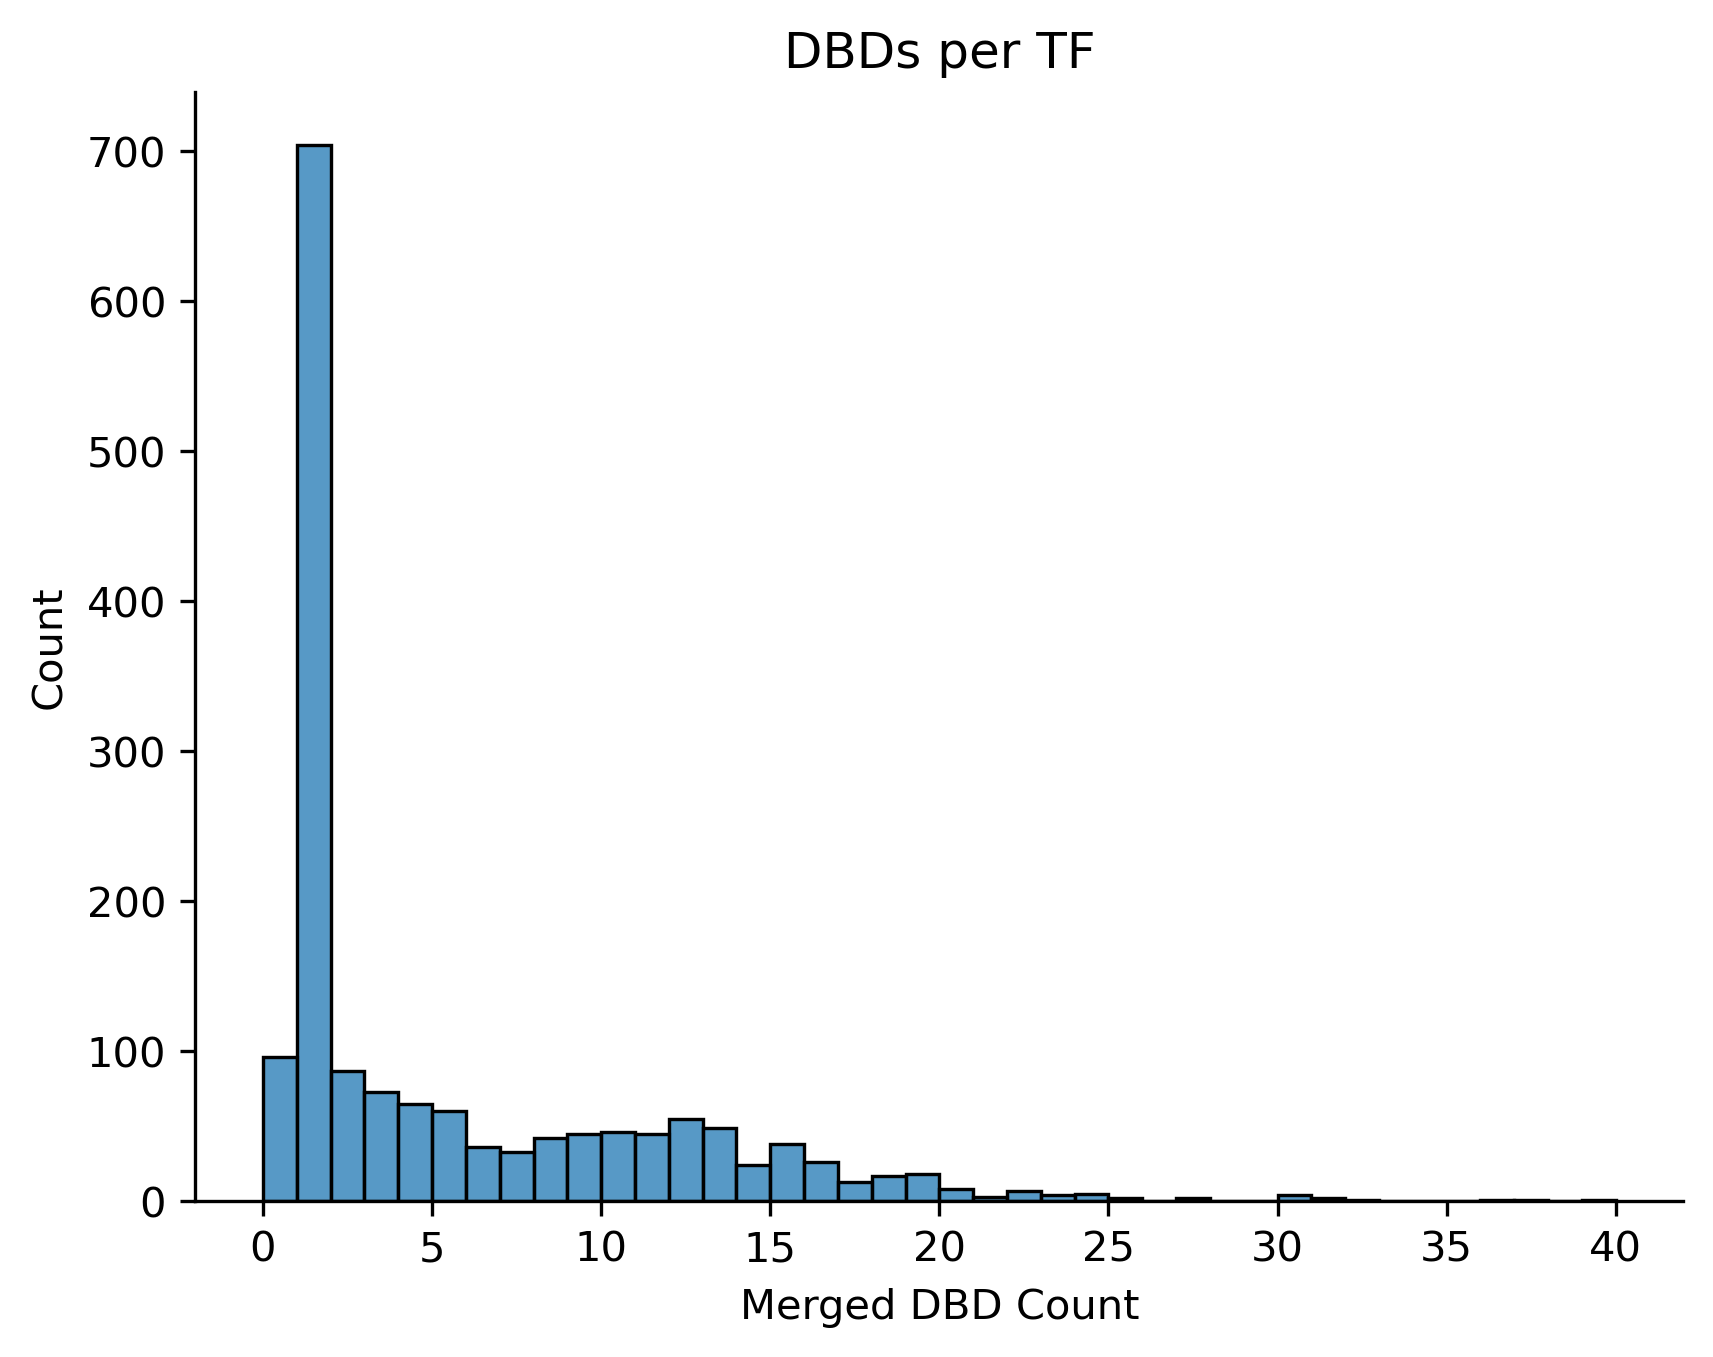

In [1658]:
plt.figure(dpi = 300)
plt.title("DBDs per TF")
plt.xlabel("Merged DBD Count")
sns.histplot(DBD_list_func_joined["num_merged_domains"], bins = np.arange(41))
sns.despine()

In [1628]:
DBD_list_func_joined[DBD_list_func_joined["num_merged_domains"] == 39]

,From,Entry,Entry Name,Function,Region,Zinc finger,Domain_extrac,combined,merged,num_merged_domains
755,ENSG00000160321,O43345,ZN208_HUMAN,[],[],"[(173, 195), (201, 223), (229, 251), (257, 279...",[],"[(173, 195), (201, 223), (229, 251), (257, 279...","[(173, 195), (201, 223), (229, 251), (257, 279...",39


In [1632]:
DBD_list_func_joined["num_orig_domains"] = [len(_) for _ in DBD_list_func_joined['combined']]
DBD_list_func_joined

,From,Entry,Entry Name,Function,Region,Zinc finger,Domain_extrac,combined,merged,num_merged_domains,num_orig_domains
0,ENSG00000001167,P23511,NFYA_HUMAN,"[(296, 321)]",[],[],[],"[(296, 321)]","[(296, 321)]",1,1
1,ENSG00000004848,Q96QS3,ARX_HUMAN,"[(328, 387)]",[],[],[],"[(328, 387)]","[(328, 387)]",1,1
2,ENSG00000005073,P31270,HXA11_HUMAN,"[(241, 300)]",[],[],[],"[(241, 300)]","[(241, 300)]",1,1
3,ENSG00000005102,P50221,MEOX1_HUMAN,"[(171, 230)]",[],[],[],"[(171, 230)]","[(171, 230)]",1,1
4,ENSG00000005513,P57073,SOX8_HUMAN,"[(102, 170)]",[],[],[],"[(102, 170)]","[(102, 170)]",1,1
...,...,...,...,...,...,...,...,...,...,...,...
1608,ENSG00000277258,P35227,PCGF2_HUMAN,[],[],"[(18, 57)]",[],"[(18, 57)]","[(18, 57)]",1,1
1609,ENSG00000277462,Q9BS34,ZN670_HUMAN,[],[],"[(103, 125), (141, 163), (197, 219), (225, 247...",[],"[(103, 125), (141, 163), (197, 219), (225, 247...","[(103, 125), (141, 163), (197, 219), (225, 247...",9,9
1610,ENSG00000278129,P17098,ZNF8_HUMAN,[],[],"[(257, 279), (285, 307), (313, 335), (341, 363...",[],"[(257, 279), (285, 307), (313, 335), (341, 363...","[(257, 279), (285, 307), (313, 335), (341, 363...",7,7
1611,ENSG00000278318,Q9UJW7,ZN229_HUMAN,[],[],"[(291, 315), (349, 371), (377, 399), (405, 427...",[],"[(291, 315), (349, 371), (377, 399), (405, 427...","[(291, 315), (349, 371), (377, 399), (405, 427...",18,18


In [1634]:
DBD_list_func_joined["merge_change"] = DBD_list_func_joined["num_merged_domains"] - DBD_list_func_joined["num_orig_domains"]
DBD_list_func_joined

,From,Entry,Entry Name,Function,Region,Zinc finger,Domain_extrac,combined,merged,num_merged_domains,num_orig_domains,merge_change
0,ENSG00000001167,P23511,NFYA_HUMAN,"[(296, 321)]",[],[],[],"[(296, 321)]","[(296, 321)]",1,1,0
1,ENSG00000004848,Q96QS3,ARX_HUMAN,"[(328, 387)]",[],[],[],"[(328, 387)]","[(328, 387)]",1,1,0
2,ENSG00000005073,P31270,HXA11_HUMAN,"[(241, 300)]",[],[],[],"[(241, 300)]","[(241, 300)]",1,1,0
3,ENSG00000005102,P50221,MEOX1_HUMAN,"[(171, 230)]",[],[],[],"[(171, 230)]","[(171, 230)]",1,1,0
4,ENSG00000005513,P57073,SOX8_HUMAN,"[(102, 170)]",[],[],[],"[(102, 170)]","[(102, 170)]",1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1608,ENSG00000277258,P35227,PCGF2_HUMAN,[],[],"[(18, 57)]",[],"[(18, 57)]","[(18, 57)]",1,1,0
1609,ENSG00000277462,Q9BS34,ZN670_HUMAN,[],[],"[(103, 125), (141, 163), (197, 219), (225, 247...",[],"[(103, 125), (141, 163), (197, 219), (225, 247...","[(103, 125), (141, 163), (197, 219), (225, 247...",9,9,0
1610,ENSG00000278129,P17098,ZNF8_HUMAN,[],[],"[(257, 279), (285, 307), (313, 335), (341, 363...",[],"[(257, 279), (285, 307), (313, 335), (341, 363...","[(257, 279), (285, 307), (313, 335), (341, 363...",7,7,0
1611,ENSG00000278318,Q9UJW7,ZN229_HUMAN,[],[],"[(291, 315), (349, 371), (377, 399), (405, 427...",[],"[(291, 315), (349, 371), (377, 399), (405, 427...","[(291, 315), (349, 371), (377, 399), (405, 427...",18,18,0


In [1636]:
DBD_list_func_joined.sort_values("merge_change")

,From,Entry,Entry Name,Function,Region,Zinc finger,Domain_extrac,combined,merged,num_merged_domains,num_orig_domains,merge_change
594,ENSG00000140836,Q15911,ZFHX3_HUMAN,"[(2145, 2204), (2242, 2301), (2641, 2700), (29...",[],"[(79, 101), (282, 305), (640, 663), (671, 694)...",[],"[(2145, 2204), (2242, 2301), (2641, 2700), (29...","[(2145, 2204), (2242, 2301), (2328, 2351), (25...",9,27,-18
141,ENSG00000091656,Q86UP3,ZFHX4_HUMAN,"[(2084, 2143), (2181, 2240), (2560, 2619), (28...",[],"[(613, 636), (644, 667), (699, 723), (767, 789...",[],"[(2084, 2143), (2181, 2240), (2560, 2619), (28...","[(2084, 2143), (2181, 2240), (2267, 2291), (24...",10,24,-14
802,ENSG00000164256,Q9NQV7,PRDM9_HUMAN,[],"[(730, 820)]","[(388, 411), (524, 546), (552, 574), (580, 602...",[],"[(730, 820), (388, 411), (524, 546), (552, 574...","[(730, 826), (832, 854), (860, 882)]",3,15,-12
166,ENSG00000101126,Q9H2P0,ADNP_HUMAN,"[(754, 814)]",[],"[(74, 97), (107, 129), (165, 188), (221, 244),...",[],"[(754, 814), (74, 97), (107, 129), (165, 188),...","[(754, 814)]",1,10,-9
172,ENSG00000101544,Q6IQ32,ADNP2_HUMAN,"[(1043, 1102)]",[],"[(73, 96), (106, 128), (155, 178), (215, 240),...",[],"[(1043, 1102), (73, 96), (106, 128), (155, 178...","[(1043, 1102)]",1,10,-9
...,...,...,...,...,...,...,...,...,...,...,...,...
569,ENSG00000138073,Q9HCU5,SEC12_HUMAN,[],[],[],[],[],[],0,0,0
568,ENSG00000137947,Q00403,TF2B_HUMAN,[],[],"[(11, 42)]",[],"[(11, 42)]","[(11, 42)]",1,1,0
567,ENSG00000137871,Q6N043,Z280D_HUMAN,[],[],"[(321, 343), (358, 381), (388, 412), (418, 441...",[],"[(321, 343), (358, 381), (388, 412), (418, 441...","[(321, 343), (358, 381), (388, 412), (418, 441...",5,5,0
576,ENSG00000138738,Q9NQX1,PRDM5_HUMAN,[],[],"[(167, 190), (199, 221), (234, 256), (262, 287...",[],"[(167, 190), (199, 221), (234, 256), (262, 287...","[(167, 190), (199, 221), (234, 256), (262, 287...",16,16,0


In [1654]:
DBD_list_func_joined["Contains Zinc finger"] = [len(_) > 0 for _ in DBD_list_func_joined["Zinc finger"]]
DBD_list_func_joined

,From,Entry,Entry Name,Function,Region,Zinc finger,Domain_extrac,combined,merged,num_merged_domains,num_orig_domains,merge_change,ZF,ZNF,Contains Zinc finger
0,ENSG00000001167,P23511,NFYA_HUMAN,"[(296, 321)]",[],[],[],"[(296, 321)]","[(296, 321)]",1,1,0,False,False,False
1,ENSG00000004848,Q96QS3,ARX_HUMAN,"[(328, 387)]",[],[],[],"[(328, 387)]","[(328, 387)]",1,1,0,False,False,False
2,ENSG00000005073,P31270,HXA11_HUMAN,"[(241, 300)]",[],[],[],"[(241, 300)]","[(241, 300)]",1,1,0,False,False,False
3,ENSG00000005102,P50221,MEOX1_HUMAN,"[(171, 230)]",[],[],[],"[(171, 230)]","[(171, 230)]",1,1,0,False,False,False
4,ENSG00000005513,P57073,SOX8_HUMAN,"[(102, 170)]",[],[],[],"[(102, 170)]","[(102, 170)]",1,1,0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1608,ENSG00000277258,P35227,PCGF2_HUMAN,[],[],"[(18, 57)]",[],"[(18, 57)]","[(18, 57)]",1,1,0,True,True,True
1609,ENSG00000277462,Q9BS34,ZN670_HUMAN,[],[],"[(103, 125), (141, 163), (197, 219), (225, 247...",[],"[(103, 125), (141, 163), (197, 219), (225, 247...","[(103, 125), (141, 163), (197, 219), (225, 247...",9,9,0,True,True,True
1610,ENSG00000278129,P17098,ZNF8_HUMAN,[],[],"[(257, 279), (285, 307), (313, 335), (341, 363...",[],"[(257, 279), (285, 307), (313, 335), (341, 363...","[(257, 279), (285, 307), (313, 335), (341, 363...",7,7,0,True,True,True
1611,ENSG00000278318,Q9UJW7,ZN229_HUMAN,[],[],"[(291, 315), (349, 371), (377, 399), (405, 427...",[],"[(291, 315), (349, 371), (377, 399), (405, 427...","[(291, 315), (349, 371), (377, 399), (405, 427...",18,18,0,True,True,True


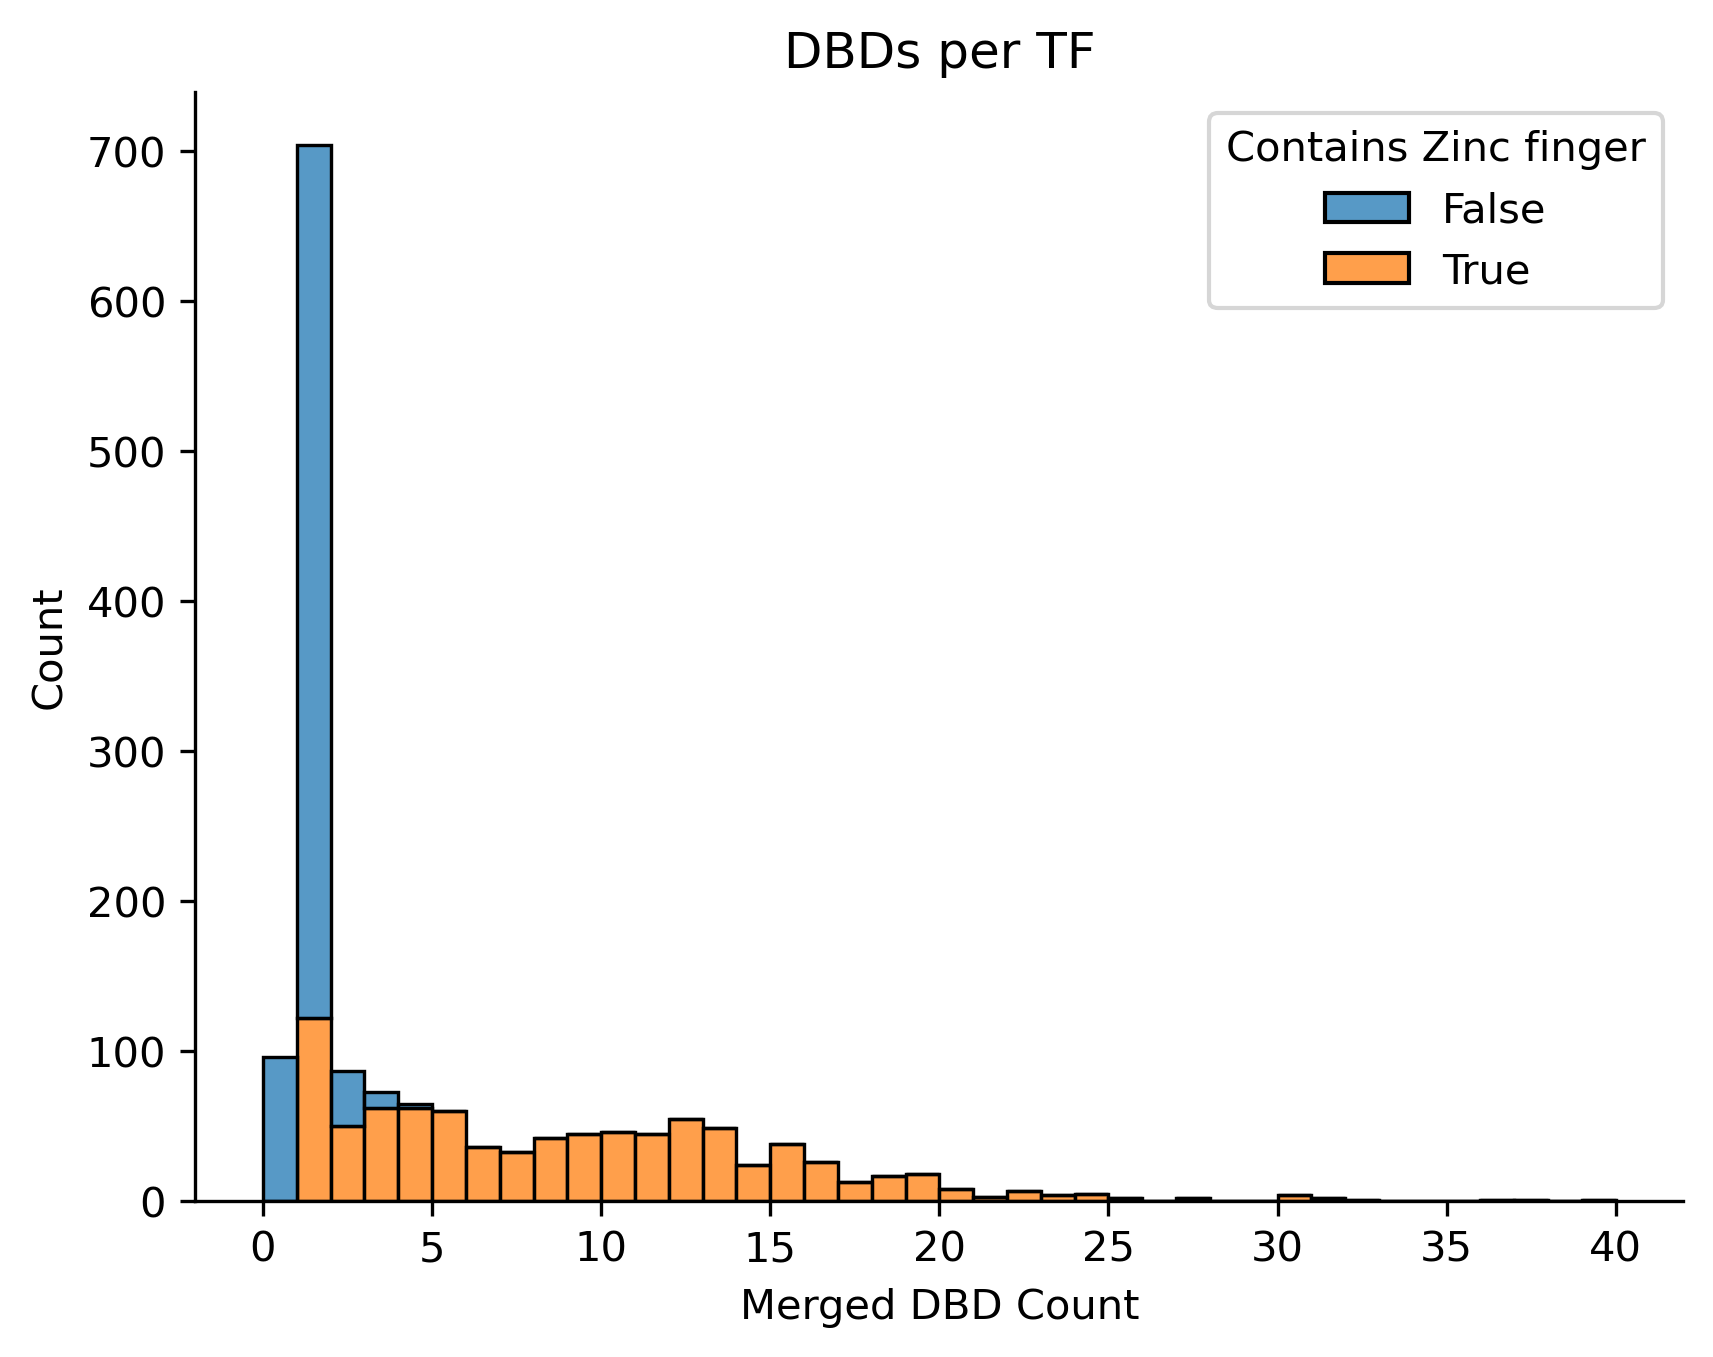

In [1662]:
plt.figure(dpi = 300)
plt.title("DBDs per TF")
plt.xlabel("Merged DBD Count")
sns.histplot(data = DBD_list_func_joined, x = "num_merged_domains", bins = np.arange(41), hue = "Contains Zinc finger", multiple = "stack")
sns.despine()

In [1668]:
DBD_list_func_joined[DBD_list_func_joined["num_merged_domains"] == 0]

,From,Entry,Entry Name,Function,Region,Zinc finger,Domain_extrac,combined,merged,num_merged_domains,num_orig_domains,merge_change,ZF,ZNF,Contains Zinc finger
7,ENSG00000006047,Q9Y2T7,YBOX2_HUMAN,[],[],[],[],[],[],0,0,0,False,False,False
11,ENSG00000006704,Q9UHL9,GT2D1_HUMAN,[],[],[],[],[],[],0,0,0,False,False,False
15,ENSG00000008196,Q92481,AP2B_HUMAN,[],[],[],[],[],[],0,0,0,False,False,False
16,ENSG00000008197,Q7Z6R9,AP2D_HUMAN,[],[],[],[],[],[],0,0,0,False,False,False
23,ENSG00000010803,Q96GD3,SCMH1_HUMAN,[],[],[],[],[],[],0,0,0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547,ENSG00000243678,P22392,NDKB_HUMAN,[],[],[],[],[],[],0,0,0,False,False,False
1555,ENSG00000249961,Q8NA31,TERB1_HUMAN,[],[],[],[],[],[],0,0,0,False,False,False
1577,ENSG00000257923,Q13948,CASP_HUMAN,[],[],[],[],[],[],0,0,0,False,False,False
1586,ENSG00000263001,P78347,GTF2I_HUMAN,[],[],[],[],[],[],0,0,0,False,False,False
